# 0. Agenda

- We are going to read a csv dataset using pandas
- We are going to apply different Exploratory Data Analysis (EDA) technique to understand the dataset we are dealing with
- We are going to apply different pre-processing techniques to pre-process the dataset
- We are going to apply the holdout validation technique
- We are going to find out correlation of features using Pearson's correlation idea
- We are going to use the scikit-learn's decision tree classifier to train as well to evaluate the performance of the dataset
- We are going to discuss the issue of model overfitting
- We are going to apply the same idea with a KNN classifier
- We are going to further implement two other classifiers which being Random Forest and Logistic Regression to find out accuracy scores
- We will finally compare all the classifiers based on their accuracy scores

# 0.1 Loading the Packages that we need

In [1]:
#Packages / libraries
#import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type 'pip install numpy scipy scikit-learn' to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')
import pydot

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
# import ipyplot
from IPython.display import Image
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# pip install graphviz
# conda install python-graphviz

In [2]:
# !pip install graphviz
# !pip install pydot
# !pip install ipython

# 1. What are we trying to solve?
 - We want to predict if a person has Internet Gaming Disorder (IGD) or not?

# 2. Read the raw data into Python from Excel File

In [3]:
raw_data = pd.read_excel('IGD Database(1)_up.xlsx') # raw_data is the panda's dataframe

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(445, 94)


Number Questionnaire  Age    Stream   Medium Sex Siblings Ethnicity  \
0       1       Sinhala   18      Arts  Sinhala   M      Two   Sinhala   
1       2       Sinhala   18  Commerce  Sinhala   M      Two   Sinhala   
2       3       Sinhala   18  Commerce  Sinhala   M      Two   Sinhala   
3       4       Sinhala   18  Commerce  Sinhala   M      One   Sinhala   
4       5       Sinhala   18  Commerce  Sinhala   M     None   Sinhala   

          Income    Sports  ... Teacher Student Cat.  Appearance Cat.   \
0  100000-199999  Moderate  ...                  Poor    Not satisfied   
1    50000-99999  Moderate  ...                  Good    Not satisfied   
2  100000-199999     Minor  ...                  Good          Neutral   
3  100000-199999     Minor  ...                  Good          Neutral   
4    20000-49999  Moderate  ...                  Good    Not satisfied   

  Friends Cat.   Esteem Cat.  Genre Cat.   Device Cat. Start Age Cat.   \
0          Many          High          BR        Other     10y or less   
1          Many      Moderate          BR       Mobile  Older than 10y   
2      Moderate          High       Other        Other  Older than 10y   
3          Many      Moderate          BR       Mobile  Older than 10y   
4           Few          High          BR       Mobile  Older than 10y   

   Weekday Cat.  Weekend Cat.   IGD Status  
0          >/=6h          0-5h           Y  
1           0-5h          0-5h           N  
2           0-5h          0-5h           N  
3           0-5h          0-5h           N  
4           0-5h          0-5h           N  

[5 rows x 94 columns]

# 3. Data Pre-Processing

In [4]:
raw_data.columns

Index(['Number', 'Questionnaire', 'Age', 'Stream', 'Medium', 'Sex', 'Siblings',
       'Ethnicity', 'Income', 'Sports', 'Unions', 'Aesthetics',
       'Sleep Hours /d', 'Sleep Quality', 'SQ Category', 'Online Learning',
       'Parent-Child', 'Teacher-Student', 'Appearance', 'No/Few Friends',
       'Self-esteem', 'Gamer? (Yes/No)', 'Game Type', 'Weekday Hours',
       'Weekend Hours', 'Genre', 'Device', 'Start Age', 'IGD 1', 'IGD 2',
       'IGD 3', 'IGD 4', 'IGD 5', 'IGD 6', 'IGD 7', 'IGD 8', 'IGD 9',
       'IGD Total', 'Criteria Endorsed', 'MOGQ 1', 'MOGQ 2', 'MOGQ 3',
       'MOGQ 4', 'MOGQ 5', 'MOGQ 6', 'MOGQ 7', 'MOGQ 8', 'MOGQ 9', 'MOGQ 10',
       'MOGQ 11', 'MOGQ 12', 'MOGQ 13', 'MOGQ 14', 'MOGQ 15', 'MOGQ 16',
       'MOGQ 17', 'MOGQ 18', 'MOGQ 19', 'MOGQ 20', 'MOGQ 21', 'MOGQ 22',
       'MOGQ 23', 'MOGQ 24', 'MOGQ 25', 'MOGQ 26', 'MOGQ 27', 'Social',
       'Escape', 'Competition', 'Coping', 'Skill Dev.', 'Fantasy',
       'Recreation', 'Age Cat. ', 'Stream Cat. ', 'Siblin

Checking for unique values in each column

In [5]:
# raw_data['Sports'].unique()

In [6]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = raw_data[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 15:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Number :445
The number of values for feature Questionnaire :3 -- ['Sinhala' 'English' nan]
The number of values for feature Age :11 -- [18 16 17 25 24 23 22 21 28 19 26]
The number of values for feature Stream :6 -- ['Arts' 'Commerce' 'Physical' 'Other' 'Bio' nan]
The number of values for feature Medium :4 -- ['Sinhala' 'English' 'English ' 'Bangla ']
The number of values for feature Sex :2 -- ['M' 'F']
The number of values for feature Siblings :4 -- ['Two' 'One' 'None' '3 or more']
The number of values for feature Ethnicity :3 -- ['Sinhala' 'Other' 'Bangladeshi']
The number of values for feature Income :6 -- ['100000-199999' '50000-99999' '20000-49999' 'more than 200000'
 'less than 20000' nan]
The number of values for feature Sports :4 -- ['Moderate' 'Minor' 'None' 'Major']
The number of values for feature Unions :5 -- ['Minor' 'Moderate' 'Major' 'None' nan]
The number of values for feature Aesthetics :5 -- ['Moderate' 'Minor' 'Major' 'None' nan]
The 

### 3.1 Checking for Null values and removing them

In [7]:
# Checking for null values
raw_data.isnull().sum()

Number               0
Questionnaire       50
Age                  0
Stream              50
Medium               0
                  ... 
Device Cat.        123
Start Age Cat.     123
Weekday Cat.       123
Weekend Cat.       123
IGD Status          26
Length: 94, dtype: int64

#### Removing the null valued records in our target

In [8]:
raw_data_IGDNULLRemoved = raw_data.dropna(subset=['IGD Status'])
raw_data_IGDNULLRemoved['IGD Status'].unique()

array(['Y', 'N'], dtype=object)

In [9]:
print(raw_data_IGDNULLRemoved.shape)
raw_data_IGDNULLRemoved.head()


(419, 94)


Number Questionnaire  Age    Stream   Medium Sex Siblings Ethnicity  \
0       1       Sinhala   18      Arts  Sinhala   M      Two   Sinhala   
1       2       Sinhala   18  Commerce  Sinhala   M      Two   Sinhala   
2       3       Sinhala   18  Commerce  Sinhala   M      Two   Sinhala   
3       4       Sinhala   18  Commerce  Sinhala   M      One   Sinhala   
4       5       Sinhala   18  Commerce  Sinhala   M     None   Sinhala   

          Income    Sports  ... Teacher Student Cat.  Appearance Cat.   \
0  100000-199999  Moderate  ...                  Poor    Not satisfied   
1    50000-99999  Moderate  ...                  Good    Not satisfied   
2  100000-199999     Minor  ...                  Good          Neutral   
3  100000-199999     Minor  ...                  Good          Neutral   
4    20000-49999  Moderate  ...                  Good    Not satisfied   

  Friends Cat.   Esteem Cat.  Genre Cat.   Device Cat. Start Age Cat.   \
0          Many          High          BR        Other     10y or less   
1          Many      Moderate          BR       Mobile  Older than 10y   
2      Moderate          High       Other        Other  Older than 10y   
3          Many      Moderate          BR       Mobile  Older than 10y   
4           Few          High          BR       Mobile  Older than 10y   

   Weekday Cat.  Weekend Cat.   IGD Status  
0          >/=6h          0-5h           Y  
1           0-5h          0-5h           N  
2           0-5h          0-5h           N  
3           0-5h          0-5h           N  
4           0-5h          0-5h           N  

[5 rows x 94 columns]

#### 3.1.1 Approach 1: If Null data is present in any column, remove that column:

In [10]:
raw_dataColumn = raw_data_IGDNULLRemoved.dropna(axis=1)
print(raw_dataColumn.shape)
raw_dataColumn.head()


(419, 13)


Number  Age   Medium Sex Siblings Ethnicity    Sports Sleep Hours /d  \
0       1   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5   
1       2   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5   
2       3   18  Sinhala   M      Two   Sinhala     Minor         6 to 7   
3       4   18  Sinhala   M      One   Sinhala     Minor         6 to 7   
4       5   18  Sinhala   M     None   Sinhala  Moderate         4 to 5   

  SQ Category Appearance  Self-esteem Friends Cat.  IGD Status  
0     Average    Average            4          Many          Y  
1     Average    Average            3          Many          N  
2        Good       Good            4      Moderate          N  
3        Good       Good            3          Many          N  
4     Average    Average            5           Few          N

In [11]:
# raw_dataIndex.columns
raw_dataColumn.columns

Index(['Number', 'Age', 'Medium', 'Sex', 'Siblings', 'Ethnicity', 'Sports',
       'Sleep Hours /d', 'SQ Category', 'Appearance', 'Self-esteem',
       'Friends Cat. ', 'IGD Status'],
      dtype='object')

In [12]:
# Checking for null values
raw_dataColumn.isnull().sum()

Number            0
Age               0
Medium            0
Sex               0
Siblings          0
Ethnicity         0
Sports            0
Sleep Hours /d    0
SQ Category       0
Appearance        0
Self-esteem       0
Friends Cat.      0
IGD Status        0
dtype: int64

In [13]:
# Investigate all the elements whithin each Feature 

for column in raw_dataColumn:
    unique_vals = raw_dataColumn[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Number :419
The number of values for feature Age :11 -- [18 16 17 25 24 23 22 21 28 19 26]
The number of values for feature Medium :4 -- ['Sinhala' 'English' 'English ' 'Bangla ']
The number of values for feature Sex :2 -- ['M' 'F']
The number of values for feature Siblings :4 -- ['Two' 'One' 'None' '3 or more']
The number of values for feature Ethnicity :3 -- ['Sinhala' 'Other' 'Bangladeshi']
The number of values for feature Sports :4 -- ['Moderate' 'Minor' 'None' 'Major']
The number of values for feature Sleep Hours /d :4 -- ['4 to 5' '6 to 7' '8 or more' 'less than 4']
The number of values for feature SQ Category :6 -- ['Average' 'Good' 'Poor' 'Ecellent' 'Very Poor' 'Excellent']
The number of values for feature Appearance :6 -- ['Average' 'Good' 'Poor' 'Ecellent' 'Very Poor' 'Excellent']
The number of values for feature Self-esteem :5 -- [4 3 5 2 1]
The number of values for feature Friends Cat.  :4 -- ['Many' 'Moderate' 'Few' 'None']
The number of va

In [14]:
#list the important columns
myList = ['Age', 'Medium', 'Sex', 'Siblings',
       'Ethnicity', 'Sports', 
       'Sleep Hours /d',  'SQ Category',
       'Appearance',
       'Self-esteem', 'Game Type', 'Weekday Hours',
       'Weekend Hours', 'Genre', 'Device', 'Start Age',
       'Friends Cat. ', 'IGD Status']
#create a new dataframe with this list
raw_data2 = raw_data[myList]
print(raw_data2.shape)
raw_data2.head()


(445, 18)


Age   Medium Sex Siblings Ethnicity    Sports Sleep Hours /d SQ Category  \
0   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
1   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
2   18  Sinhala   M      Two   Sinhala     Minor         6 to 7        Good   
3   18  Sinhala   M      One   Sinhala     Minor         6 to 7        Good   
4   18  Sinhala   M     None   Sinhala  Moderate         4 to 5     Average   

  Appearance  Self-esteem              Game Type Weekday Hours Weekend Hours  \
0    Average            4     Online Multiplayer        6 to 7        4 to 5   
1    Average            3     Online Multiplayer     1 or less        2 to 3   
2       Good            4     Online Multiplayer        4 to 5        4 to 5   
3       Good            3     Online Multiplayer        2 to 3        2 to 3   
4    Average            5  Offline Single player     1 or less     1 or less   

            Genre  Device Start Age Friends Cat.  IGD Status  
0              BR      PC   8 to 10          Many          Y  
1              BR  Mobile  14 to 16          Many          N  
2  Non BR Shooter      PC  11 to 13      Moderate          N  
3              BR  Mobile  14 to 16          Many          N  
4              BR  Mobile  14 to 16           Few          N

#### 3.1.2 Approach 2: If Null data is present in any column, remove that record:

In [15]:
raw_dataIndex = raw_data.dropna()
print(raw_dataIndex.shape)
raw_dataIndex.head()

(322, 94)


Number Questionnaire  Age    Stream   Medium Sex Siblings Ethnicity  \
0       1       Sinhala   18      Arts  Sinhala   M      Two   Sinhala   
1       2       Sinhala   18  Commerce  Sinhala   M      Two   Sinhala   
2       3       Sinhala   18  Commerce  Sinhala   M      Two   Sinhala   
3       4       Sinhala   18  Commerce  Sinhala   M      One   Sinhala   
4       5       Sinhala   18  Commerce  Sinhala   M     None   Sinhala   

          Income    Sports  ... Teacher Student Cat.  Appearance Cat.   \
0  100000-199999  Moderate  ...                  Poor    Not satisfied   
1    50000-99999  Moderate  ...                  Good    Not satisfied   
2  100000-199999     Minor  ...                  Good          Neutral   
3  100000-199999     Minor  ...                  Good          Neutral   
4    20000-49999  Moderate  ...                  Good    Not satisfied   

  Friends Cat.   Esteem Cat.  Genre Cat.   Device Cat. Start Age Cat.   \
0          Many          High          BR        Other     10y or less   
1          Many      Moderate          BR       Mobile  Older than 10y   
2      Moderate          High       Other        Other  Older than 10y   
3          Many      Moderate          BR       Mobile  Older than 10y   
4           Few          High          BR       Mobile  Older than 10y   

   Weekday Cat.  Weekend Cat.   IGD Status  
0          >/=6h          0-5h           Y  
1           0-5h          0-5h           N  
2           0-5h          0-5h           N  
3           0-5h          0-5h           N  
4           0-5h          0-5h           N  

[5 rows x 94 columns]

In [16]:
raw_dataIndex.isnull().sum()

Number             0
Questionnaire      0
Age                0
Stream             0
Medium             0
                  ..
Device Cat.        0
Start Age Cat.     0
Weekday Cat.       0
Weekend Cat.       0
IGD Status         0
Length: 94, dtype: int64

In [17]:
raw_dataIndex.columns

Index(['Number', 'Questionnaire', 'Age', 'Stream', 'Medium', 'Sex', 'Siblings',
       'Ethnicity', 'Income', 'Sports', 'Unions', 'Aesthetics',
       'Sleep Hours /d', 'Sleep Quality', 'SQ Category', 'Online Learning',
       'Parent-Child', 'Teacher-Student', 'Appearance', 'No/Few Friends',
       'Self-esteem', 'Gamer? (Yes/No)', 'Game Type', 'Weekday Hours',
       'Weekend Hours', 'Genre', 'Device', 'Start Age', 'IGD 1', 'IGD 2',
       'IGD 3', 'IGD 4', 'IGD 5', 'IGD 6', 'IGD 7', 'IGD 8', 'IGD 9',
       'IGD Total', 'Criteria Endorsed', 'MOGQ 1', 'MOGQ 2', 'MOGQ 3',
       'MOGQ 4', 'MOGQ 5', 'MOGQ 6', 'MOGQ 7', 'MOGQ 8', 'MOGQ 9', 'MOGQ 10',
       'MOGQ 11', 'MOGQ 12', 'MOGQ 13', 'MOGQ 14', 'MOGQ 15', 'MOGQ 16',
       'MOGQ 17', 'MOGQ 18', 'MOGQ 19', 'MOGQ 20', 'MOGQ 21', 'MOGQ 22',
       'MOGQ 23', 'MOGQ 24', 'MOGQ 25', 'MOGQ 26', 'MOGQ 27', 'Social',
       'Escape', 'Competition', 'Coping', 'Skill Dev.', 'Fantasy',
       'Recreation', 'Age Cat. ', 'Stream Cat. ', 'Siblin

In [18]:
# Investigate all the elements whithin each Feature 

for column in raw_dataIndex:
    unique_vals = raw_dataIndex[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Number :322
The number of values for feature Questionnaire :2 -- ['Sinhala' 'English']
The number of values for feature Age :3 -- [18 16 17]
The number of values for feature Stream :5 -- ['Arts' 'Commerce' 'Physical' 'Other' 'Bio']
The number of values for feature Medium :2 -- ['Sinhala' 'English']
The number of values for feature Sex :2 -- ['M' 'F']
The number of values for feature Siblings :4 -- ['Two' 'One' 'None' '3 or more']
The number of values for feature Ethnicity :2 -- ['Sinhala' 'Other']
The number of values for feature Income :5 -- ['100000-199999' '50000-99999' '20000-49999' 'more than 200000'
 'less than 20000']
The number of values for feature Sports :4 -- ['Moderate' 'Minor' 'None' 'Major']
The number of values for feature Unions :4 -- ['Minor' 'Moderate' 'Major' 'None']
The number of values for feature Aesthetics :4 -- ['Moderate' 'Minor' 'Major' 'None']
The number of values for feature Sleep Hours /d :4 -- ['4 to 5' '6 to 7' '8 or more'

In [19]:
#list the important columns
myList = ['Age', 'Medium', 'Sex', 'Siblings',
       'Ethnicity', 'Sports', 
       'Sleep Hours /d',  'SQ Category',
       'Appearance',
       'Self-esteem', 'Game Type', 'Weekday Hours',
       'Weekend Hours', 'Genre', 'Device', 'Start Age',
       'Friends Cat. ', 'IGD Status']
#create a new dataframe with this list
raw_data2 = raw_data[myList]
print(raw_data2.shape)
raw_data2.head()


(445, 18)


Age   Medium Sex Siblings Ethnicity    Sports Sleep Hours /d SQ Category  \
0   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
1   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
2   18  Sinhala   M      Two   Sinhala     Minor         6 to 7        Good   
3   18  Sinhala   M      One   Sinhala     Minor         6 to 7        Good   
4   18  Sinhala   M     None   Sinhala  Moderate         4 to 5     Average   

  Appearance  Self-esteem              Game Type Weekday Hours Weekend Hours  \
0    Average            4     Online Multiplayer        6 to 7        4 to 5   
1    Average            3     Online Multiplayer     1 or less        2 to 3   
2       Good            4     Online Multiplayer        4 to 5        4 to 5   
3       Good            3     Online Multiplayer        2 to 3        2 to 3   
4    Average            5  Offline Single player     1 or less     1 or less   

            Genre  Device Start Age Friends Cat.  IGD Status  
0              BR      PC   8 to 10          Many          Y  
1              BR  Mobile  14 to 16          Many          N  
2  Non BR Shooter      PC  11 to 13      Moderate          N  
3              BR  Mobile  14 to 16          Many          N  
4              BR  Mobile  14 to 16           Few          N

#### 3.1.3 Decision: Approach 2 is taken
Some of the necessary columns are vanished if we take approach 1. However, if we take approach 2 they remain intact.

### 3.2 Visualise the data

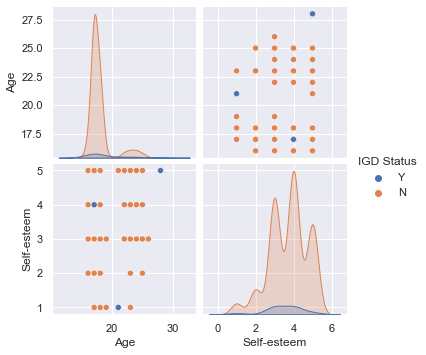

In [20]:
#visualize the dataset with sns pairplot
#caution: takes a lot of data - so we limit the data
g = sns.pairplot(raw_data2, hue = 'IGD Status')

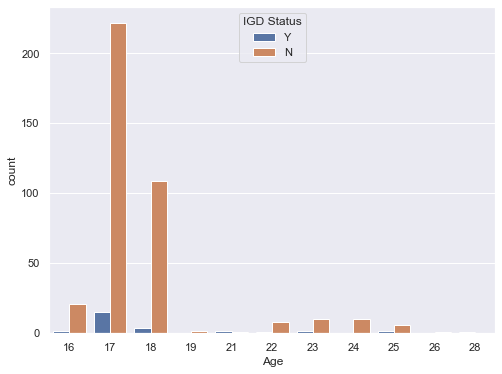

In [21]:
sns.countplot(x = 'Age', data = raw_data2, hue = 'IGD Status');

## 3.3Investigate the categorical plots

In [22]:
raw_data2.head()

Age   Medium Sex Siblings Ethnicity    Sports Sleep Hours /d SQ Category  \
0   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
1   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
2   18  Sinhala   M      Two   Sinhala     Minor         6 to 7        Good   
3   18  Sinhala   M      One   Sinhala     Minor         6 to 7        Good   
4   18  Sinhala   M     None   Sinhala  Moderate         4 to 5     Average   

  Appearance  Self-esteem              Game Type Weekday Hours Weekend Hours  \
0    Average            4     Online Multiplayer        6 to 7        4 to 5   
1    Average            3     Online Multiplayer     1 or less        2 to 3   
2       Good            4     Online Multiplayer        4 to 5        4 to 5   
3       Good            3     Online Multiplayer        2 to 3        2 to 3   
4    Average            5  Offline Single player     1 or less     1 or less   

            Genre  Device Start Age Friends Cat.  IGD Status  
0              BR      PC   8 to 10          Many          Y  
1              BR  Mobile  14 to 16          Many          N  
2  Non BR Shooter      PC  11 to 13      Moderate          N  
3              BR  Mobile  14 to 16          Many          N  
4              BR  Mobile  14 to 16           Few          N

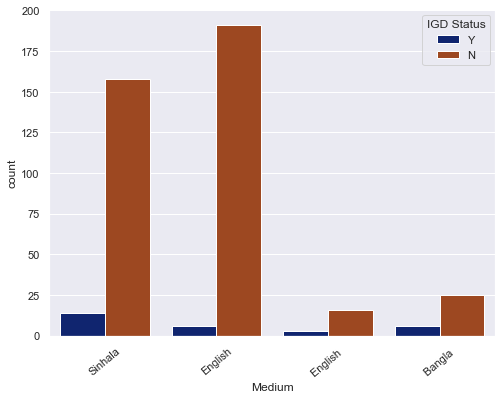

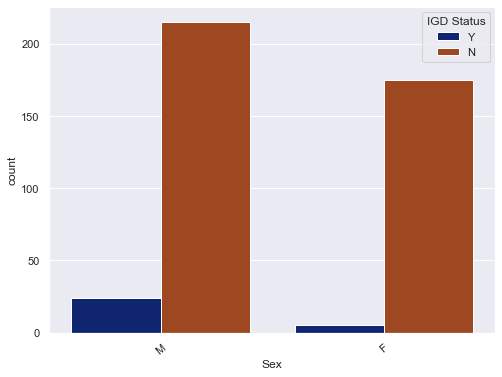

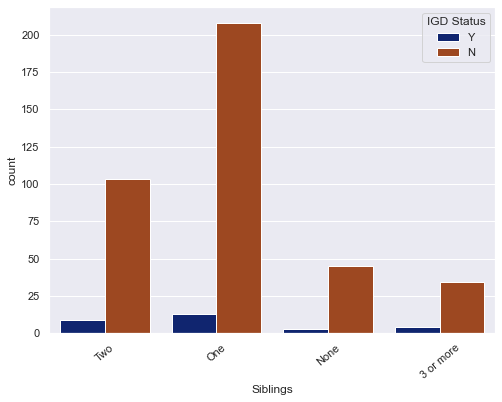

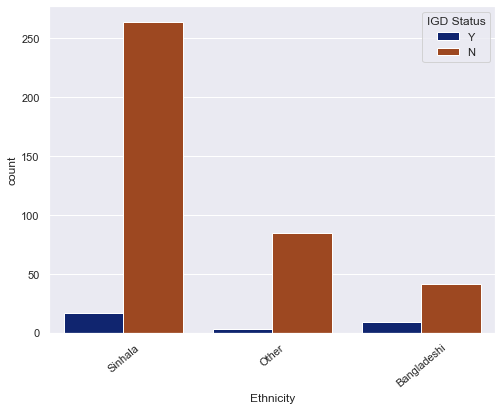

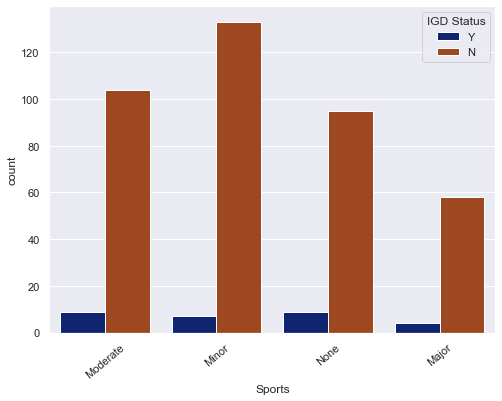

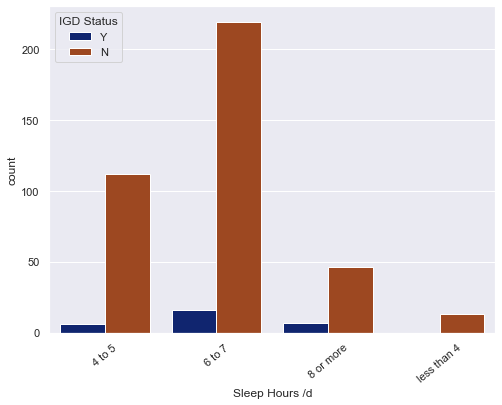

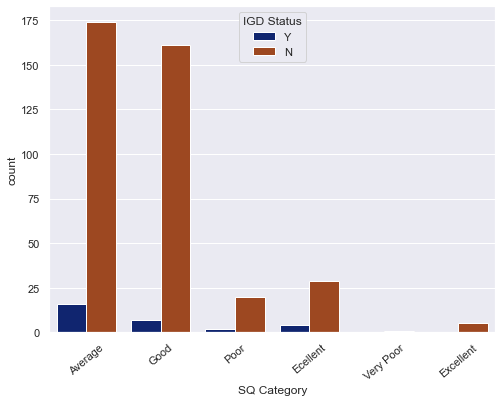

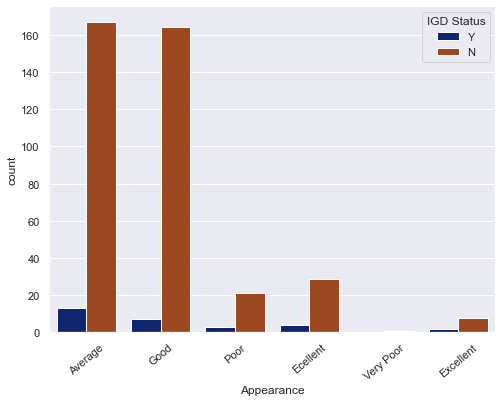

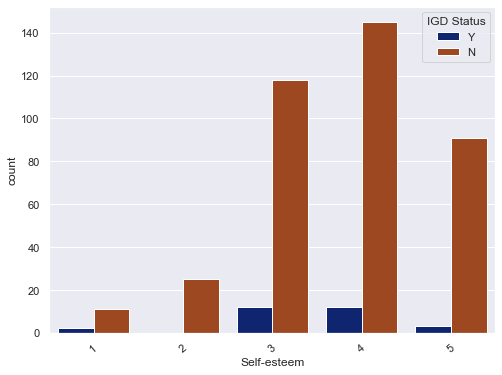

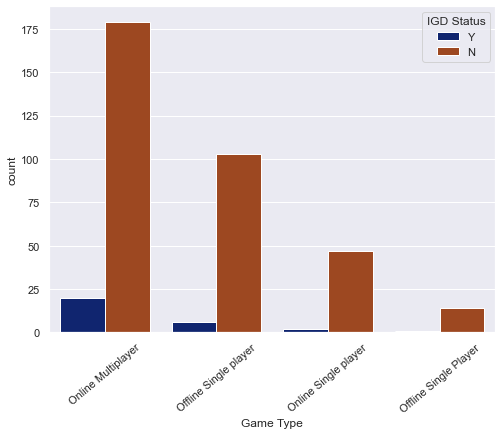

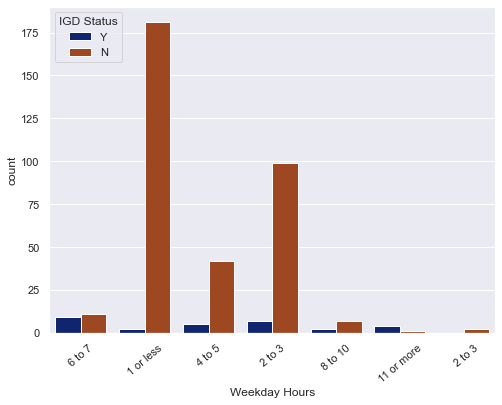

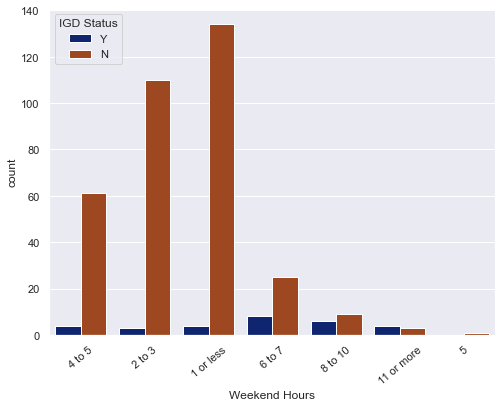

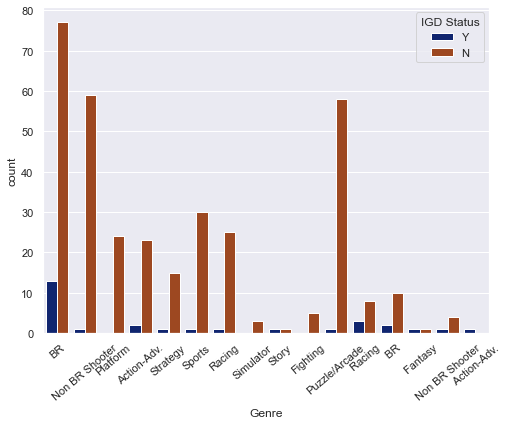

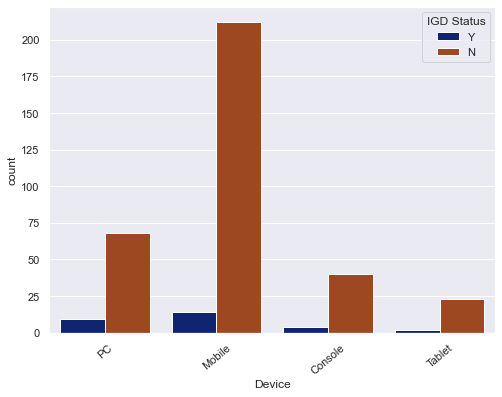

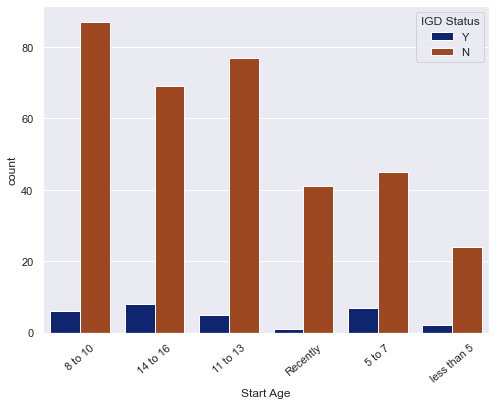

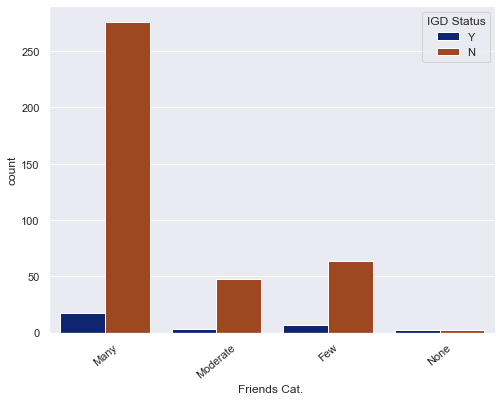

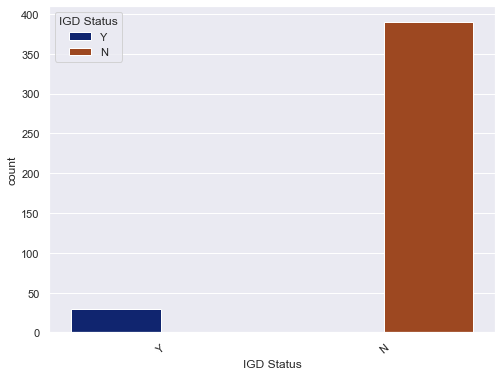

In [23]:
cat_features = ['Medium', 'Sex', 'Siblings',
       'Ethnicity', 'Sports', 
       'Sleep Hours /d',  'SQ Category',
       'Appearance',
       'Self-esteem', 'Game Type', 'Weekday Hours',
       'Weekend Hours', 'Genre', 'Device', 'Start Age',
       'Friends Cat. ', 'IGD Status']
format_extension = '.png'
i = 0;
for f in cat_features:
#     plt.figure(figsize=(6,2)) # best image size for laTeX
    plt.figure()
    plt.xticks(rotation=40)
    sns.countplot(x = f, data = raw_data2, hue = 'IGD Status', palette = 'dark')
#     plt.savefig(str(i)+format_extension, bbox_inches="tight") # for saving all the images
    i = i+1
raw_data3 = raw_data2

# 3.4 Making numeric representation of categorical variables

In [24]:
print(raw_data3.shape)
raw_data3.head()

(445, 18)


Age   Medium Sex Siblings Ethnicity    Sports Sleep Hours /d SQ Category  \
0   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
1   18  Sinhala   M      Two   Sinhala  Moderate         4 to 5     Average   
2   18  Sinhala   M      Two   Sinhala     Minor         6 to 7        Good   
3   18  Sinhala   M      One   Sinhala     Minor         6 to 7        Good   
4   18  Sinhala   M     None   Sinhala  Moderate         4 to 5     Average   

  Appearance  Self-esteem              Game Type Weekday Hours Weekend Hours  \
0    Average            4     Online Multiplayer        6 to 7        4 to 5   
1    Average            3     Online Multiplayer     1 or less        2 to 3   
2       Good            4     Online Multiplayer        4 to 5        4 to 5   
3       Good            3     Online Multiplayer        2 to 3        2 to 3   
4    Average            5  Offline Single player     1 or less     1 or less   

            Genre  Device Start Age Friends Cat.  IGD Status  
0              BR      PC   8 to 10          Many          Y  
1              BR  Mobile  14 to 16          Many          N  
2  Non BR Shooter      PC  11 to 13      Moderate          N  
3              BR  Mobile  14 to 16          Many          N  
4              BR  Mobile  14 to 16           Few          N

##### In the code below, we check if a column is a catagorical column or not. Then we output the catagorical columns

In [25]:
save = raw_data3
array =[];
catagory=[];
new_raw_data = pd.get_dummies(raw_data3)
for column in save:
    if column in new_raw_data:
        array.append(column);
array.append('IGD Status')
array
for column in save:
    if column not in array:
        catagory.append(column)
catagory

# new_raw_data = pd.get_dummies(raw_data3,columns=catagory)
# print(new_raw_data.shape)
# new_raw_data.head()


['Medium',
 'Sex',
 'Siblings',
 'Ethnicity',
 'Sports',
 'Sleep Hours /d',
 'SQ Category',
 'Appearance',
 'Game Type',
 'Weekday Hours',
 'Weekend Hours',
 'Genre',
 'Device',
 'Start Age',
 'Friends Cat. ']

In [26]:
new_raw_data.head()

Age  Self-esteem  Medium_Bangla   Medium_English  Medium_English   \
0   18            4               0               0                0   
1   18            3               0               0                0   
2   18            4               0               0                0   
3   18            3               0               0                0   
4   18            5               0               0                0   

   Medium_Sinhala  Sex_F  Sex_M  Siblings_3 or more  Siblings_None  ...  \
0               1      0      1                   0              0  ...   
1               1      0      1                   0              0  ...   
2               1      0      1                   0              0  ...   
3               1      0      1                   0              0  ...   
4               1      0      1                   0              1  ...   

   Start Age_5 to 7  Start Age_8 to 10  Start Age_Recently  \
0                 0                  1                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 0                  0                   0   

   Start Age_less than 5  Friends Cat. _Few  Friends Cat. _Many  \
0                      0                  0                   1   
1                      0                  0                   1   
2                      0                  0                   0   
3                      0                  0                   1   
4                      0                  1                   0   

   Friends Cat. _Moderate  Friends Cat. _None  IGD Status_N  IGD Status_Y  
0                       0                   0             0             1  
1                       0                   0             1             0  
2                       1                   0             1             0  
3                       0                   0             1             0  
4                       0                   0             1             0  

[5 rows x 85 columns]

In [27]:
# save = new_raw_data['IGD Status']
new_raw_data = pd.get_dummies(raw_data3)
print(new_raw_data.shape)
new_raw_data.head()

(445, 85)


Age  Self-esteem  Medium_Bangla   Medium_English  Medium_English   \
0   18            4               0               0                0   
1   18            3               0               0                0   
2   18            4               0               0                0   
3   18            3               0               0                0   
4   18            5               0               0                0   

   Medium_Sinhala  Sex_F  Sex_M  Siblings_3 or more  Siblings_None  ...  \
0               1      0      1                   0              0  ...   
1               1      0      1                   0              0  ...   
2               1      0      1                   0              0  ...   
3               1      0      1                   0              0  ...   
4               1      0      1                   0              1  ...   

   Start Age_5 to 7  Start Age_8 to 10  Start Age_Recently  \
0                 0                  1                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 0                  0                   0   

   Start Age_less than 5  Friends Cat. _Few  Friends Cat. _Many  \
0                      0                  0                   1   
1                      0                  0                   1   
2                      0                  0                   0   
3                      0                  0                   1   
4                      0                  1                   0   

   Friends Cat. _Moderate  Friends Cat. _None  IGD Status_N  IGD Status_Y  
0                       0                   0             0             1  
1                       0                   0             1             0  
2                       1                   0             1             0  
3                       0                   0             1             0  
4                       0                   0             1             0  

[5 rows x 85 columns]

In [28]:
new_raw_data.drop(columns=['IGD Status_N'],inplace=True)

In [29]:
# raw_data_temp.drop(columns='IGD Status')
# raw_data_temp.shape[1]
# raw_data_temp.append()
# raw_data_temp.insert(raw_data_temp[1],'IGD Status',save)
# raw_data_temp.assign(IGD Status =[save])
# Checking for null values
new_raw_data['IGD Status_Y'].isnull().sum()

0

# 4. Splitting the Raw Data - Hold-out validation

In [30]:
X = new_raw_data.drop(columns = 'IGD Status_Y')# Input features (attributes)
y = new_raw_data['IGD Status_Y'] # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=10,stratify=y)
print('X_train shape: {}'.format(np.shape(X_train)))
print('y_train shape: {}'.format(np.shape(y_train)))
print('X_test shape: {}'.format(np.shape(X_test)))
print('y_test shape: {}'.format(np.shape(y_test)))

X shape: (445, 83)
y shape: (445,)
X_train shape: (356, 83)
y_train shape: (356,)
X_test shape: (89, 83)
y_test shape: (89,)


In [31]:
X_train.head()

Age  Self-esteem  Medium_Bangla   Medium_English  Medium_English   \
94    17            4               0               1                0   
324   17            3               0               1                0   
298   17            4               0               1                0   
347   17            5               0               1                0   
427   23            4               1               0                0   

     Medium_Sinhala  Sex_F  Sex_M  Siblings_3 or more  Siblings_None  ...  \
94                0      0      1                   0              0  ...   
324               0      0      1                   0              0  ...   
298               0      1      0                   0              0  ...   
347               0      0      1                   0              0  ...   
427               0      0      1                   0              0  ...   

     Start Age_11 to 13  Start Age_14 to 16  Start Age_5 to 7  \
94                    0                   0                 1   
324                   0                   0                 0   
298                   0                   0                 0   
347                   0                   0                 0   
427                   0                   0                 0   

     Start Age_8 to 10  Start Age_Recently  Start Age_less than 5  \
94                   0                   0                      0   
324                  0                   0                      1   
298                  0                   0                      1   
347                  0                   0                      0   
427                  0                   1                      0   

     Friends Cat. _Few  Friends Cat. _Many  Friends Cat. _Moderate  \
94                   0                   1                       0   
324                  0                   1                       0   
298                  1                   0                       0   
347                  0                   1                       0   
427                  0                   1                       0   

     Friends Cat. _None  
94                    0  
324                   0  
298                   0  
347                   0  
427                   0  

[5 rows x 83 columns]

In [32]:
X_test.head()

Age  Self-esteem  Medium_Bangla   Medium_English  Medium_English   \
423   23            4               1               0                0   
376   17            3               0               0                0   
364   17            4               0               0                0   
167   17            4               0               1                0   
101   17            3               0               1                0   

     Medium_Sinhala  Sex_F  Sex_M  Siblings_3 or more  Siblings_None  ...  \
423               0      1      0                   0              0  ...   
376               1      0      1                   0              0  ...   
364               1      0      1                   0              0  ...   
167               0      1      0                   0              0  ...   
101               0      0      1                   0              0  ...   

     Start Age_11 to 13  Start Age_14 to 16  Start Age_5 to 7  \
423                   0                   0                 1   
376                   1                   0                 0   
364                   1                   0                 0   
167                   0                   1                 0   
101                   0                   1                 0   

     Start Age_8 to 10  Start Age_Recently  Start Age_less than 5  \
423                  0                   0                      0   
376                  0                   0                      0   
364                  0                   0                      0   
167                  0                   0                      0   
101                  0                   0                      0   

     Friends Cat. _Few  Friends Cat. _Many  Friends Cat. _Moderate  \
423                  1                   0                       0   
376                  0                   0                       1   
364                  0                   1                       0   
167                  0                   1                       0   
101                  0                   0                       1   

     Friends Cat. _None  
423                   0  
376                   0  
364                   0  
167                   0  
101                   0  

[5 rows x 83 columns]

<h3>4.1 Finding Correlation of Features using Pearson's Correlation Idea</h3>

In [33]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

Age  Self-esteem  Medium_Bangla   Medium_English  \
Age                     1.000000    -0.013340        0.695983       -0.256464   
Self-esteem            -0.013340     1.000000       -0.034444       -0.115187   
Medium_Bangla           0.695983    -0.034444        1.000000       -0.241249   
Medium_English         -0.256464    -0.115187       -0.241249        1.000000   
Medium_English          0.529453    -0.011504       -0.055675       -0.203914   
...                          ...          ...             ...             ...   
Start Age_less than 5  -0.068777    -0.058253       -0.065868        0.179525   
Friends Cat. _Few       0.283687    -0.038658        0.273612       -0.158768   
Friends Cat. _Many     -0.189495     0.141229       -0.219929        0.096380   
Friends Cat. _Moderate -0.120878    -0.107513       -0.097626        0.065898   
Friends Cat. _None      0.252194    -0.157763        0.359199       -0.086656   

                        Medium_English   Medium_Sinhala     Sex_F     Sex_M  \
Age                            0.529453       -0.302075 -0.153702  0.153702   
Self-esteem                   -0.011504        0.137917 -0.128752  0.128752   
Medium_Bangla                 -0.055675       -0.220267 -0.153450  0.153450   
Medium_English                -0.203914       -0.806750  0.258563 -0.258563   
Medium_English                 1.000000       -0.186180 -0.107312  0.107312   
...                                 ...             ...       ...       ...   
Start Age_less than 5         -0.055675       -0.125848 -0.012170  0.012170   
Friends Cat. _Few              0.129708       -0.027363 -0.065790  0.065790   
Friends Cat. _Many            -0.039530        0.026402 -0.037544  0.037544   
Friends Cat. _Moderate        -0.082518        0.015615  0.128539 -0.128539   
Friends Cat. _None            -0.019998       -0.079120 -0.018468  0.018468   

                        Siblings_3 or more  Siblings_None  ...  \
Age                               0.082139      -0.049850  ...   
Self-esteem                       0.017450       0.040587  ...   
Medium_Bangla                     0.006134      -0.057700  ...   
Medium_English                   -0.001480      -0.012254  ...   
Medium_English                    0.080614      -0.037308  ...   
...                                    ...            ...  ...   
Start Age_less than 5             0.006134       0.050792  ...   
Friends Cat. _Few                 0.007801      -0.014511  ...   
Friends Cat. _Many                0.016990       0.024313  ...   
Friends Cat. _Moderate           -0.024104      -0.008097  ...   
Friends Cat. _None               -0.027966      -0.033716  ...   

                        Start Age_11 to 13  Start Age_14 to 16  \
Age                              -0.042318           -0.040564   
Self-esteem                       0.021631            0.116091   
Medium_Bangla                    -0.035679            0.042477   
Medium_English                    0.044405           -0.146486   
Medium_English                   -0.001938           -0.096687   
...                                    ...                 ...   
Start Age_less than 5            -0.124709           -0.114389   
Friends Cat. _Few                -0.092179            0.056418   
Friends Cat. _Many                0.029309            0.003920   
Friends Cat. _Moderate            0.051705           -0.055875   
Friends Cat. _None                0.033377           -0.041089   

                        Start Age_5 to 7  Start Age_8 to 10  \
Age                             0.239360          -0.005988   
Self-esteem                    -0.105561          -0.042286   
Medium_Bangla                   0.053584          -0.026379   
Medium_English                  0.013522           0.046820   
Medium_English                  0.261513           0.045622   
...                                  ...                ...   
Start Age_less than 5          -0.092592          -0.138175   
Friends Cat. _Few

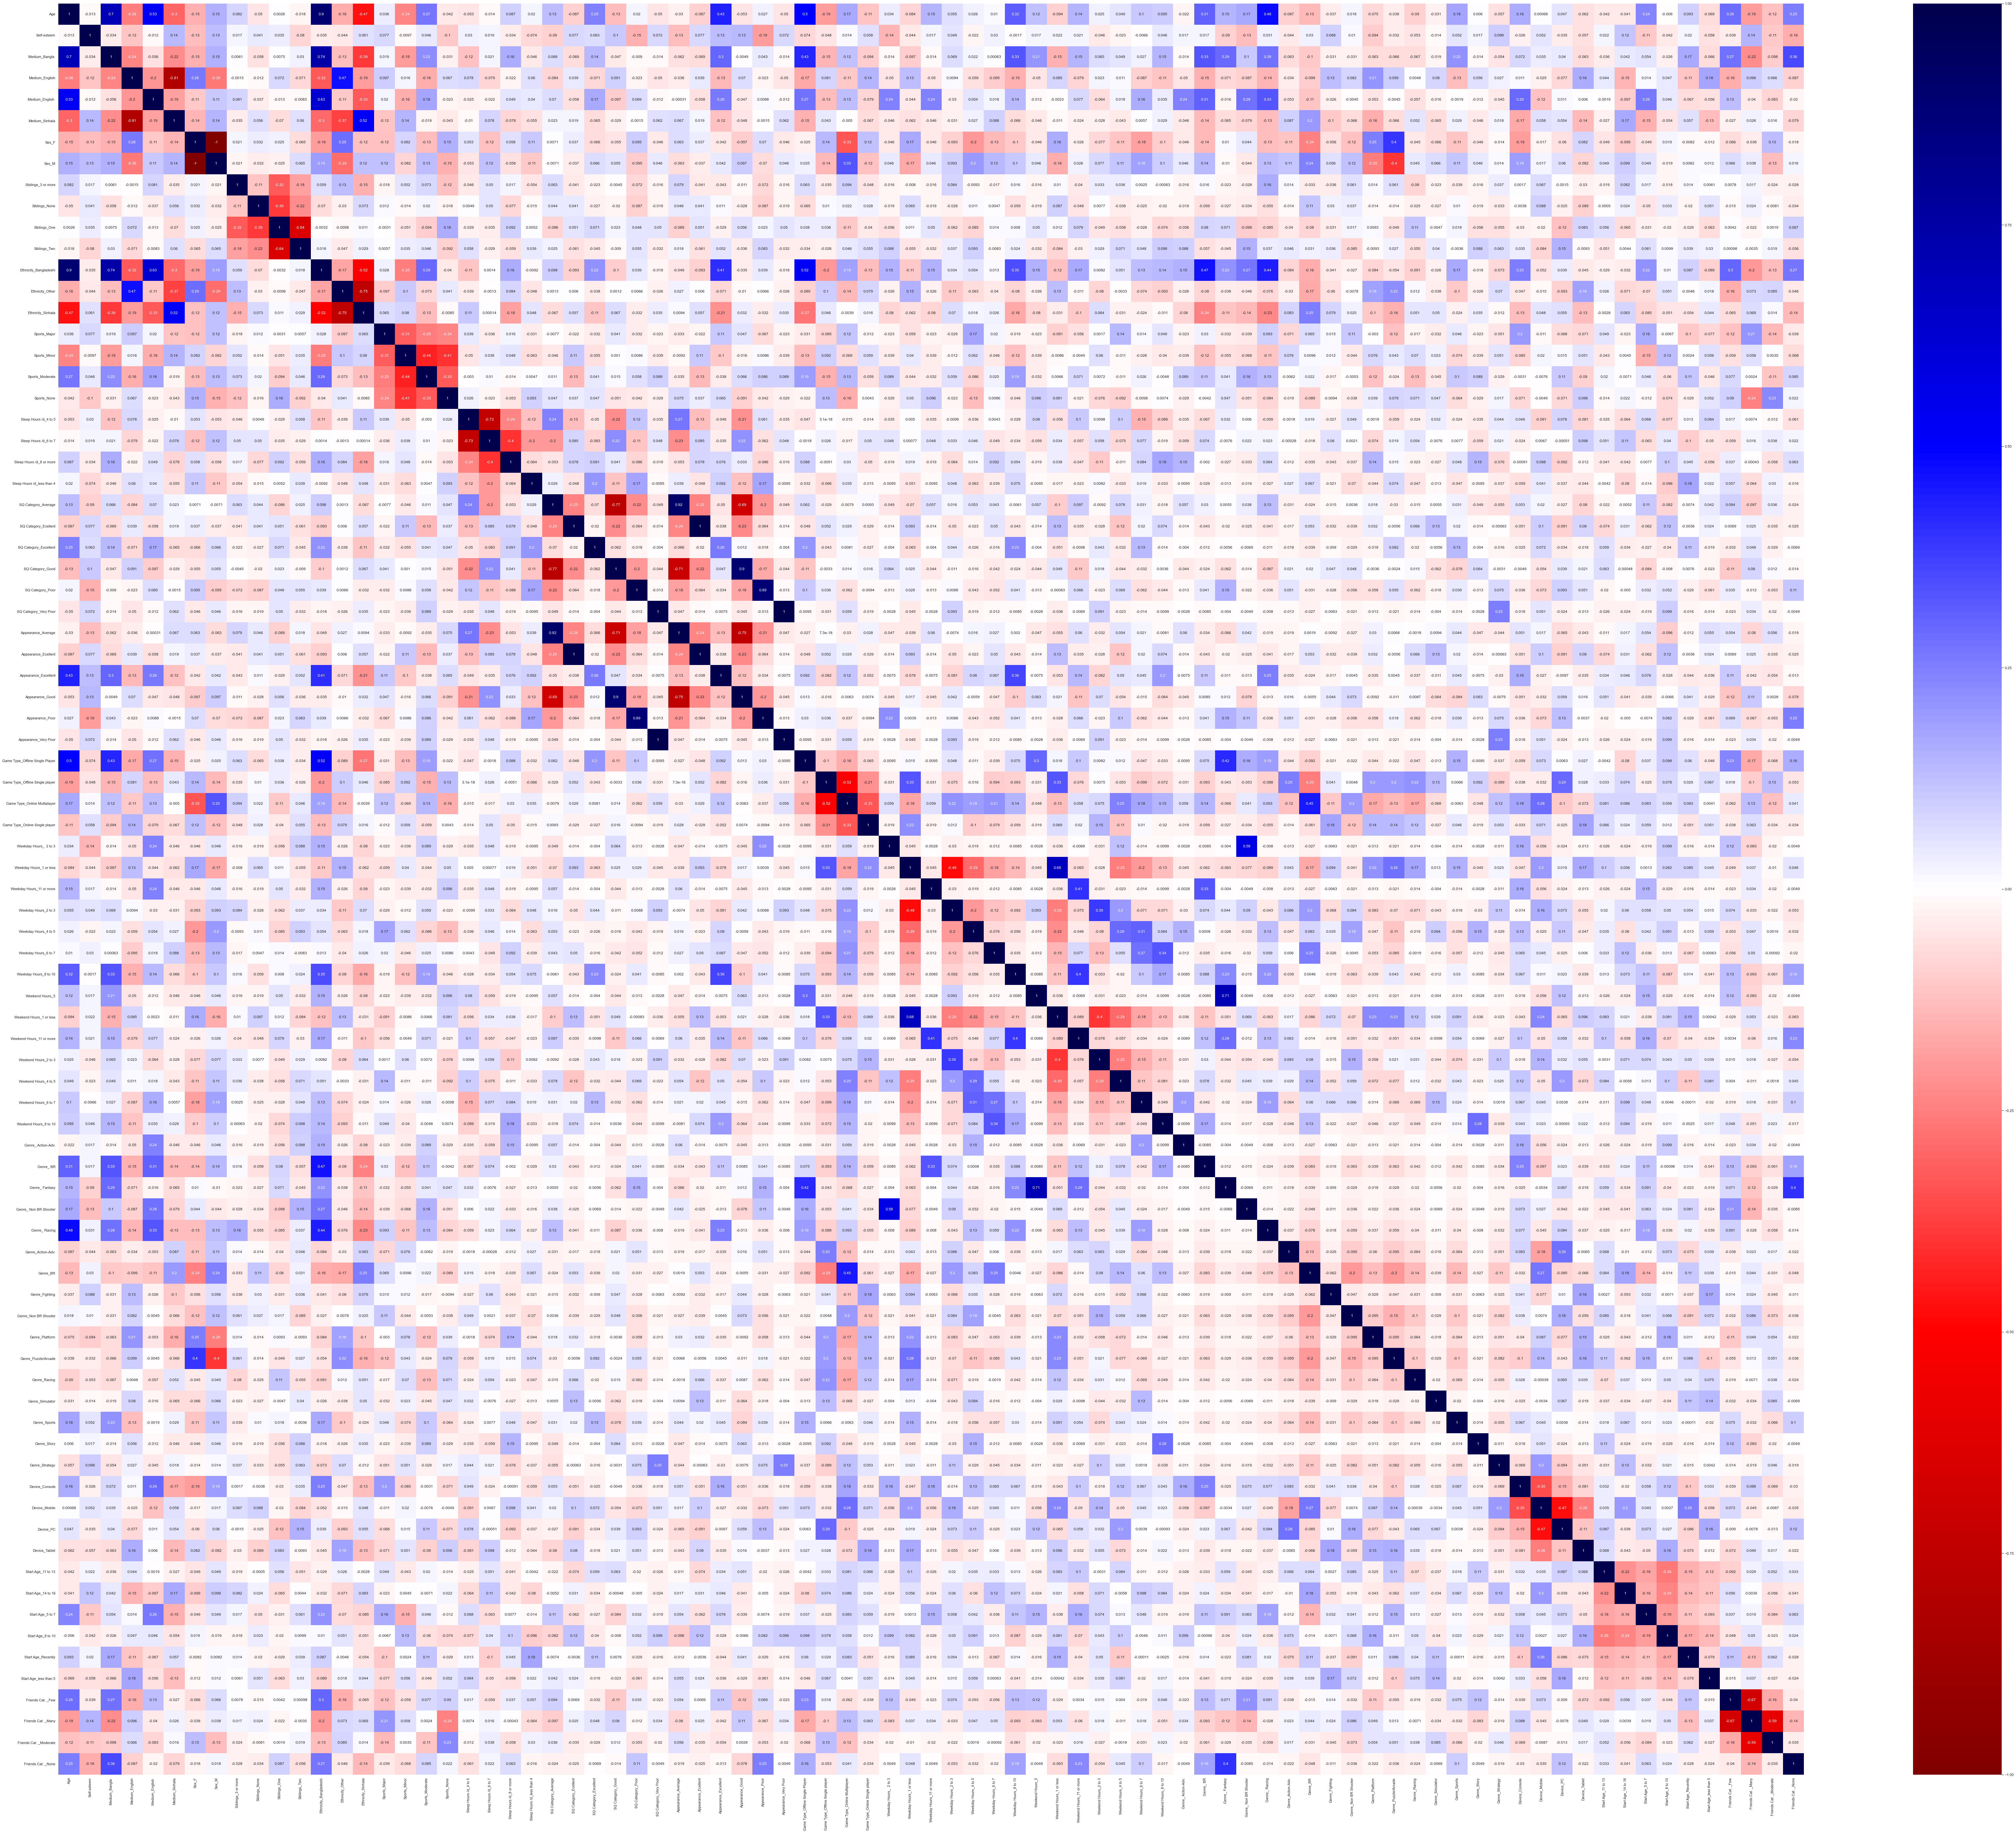

In [34]:
# A good way to visualize correlation is using a heatmap
#IMPORTANT: Smaller figsize gives terrible image output
plt.figure(figsize = (120, 100))
sns.heatmap(corr, annot = True, cmap='seismic_r');
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# plt.savefig('heatmap_full.png', bbox_inches="tight") # for saving image

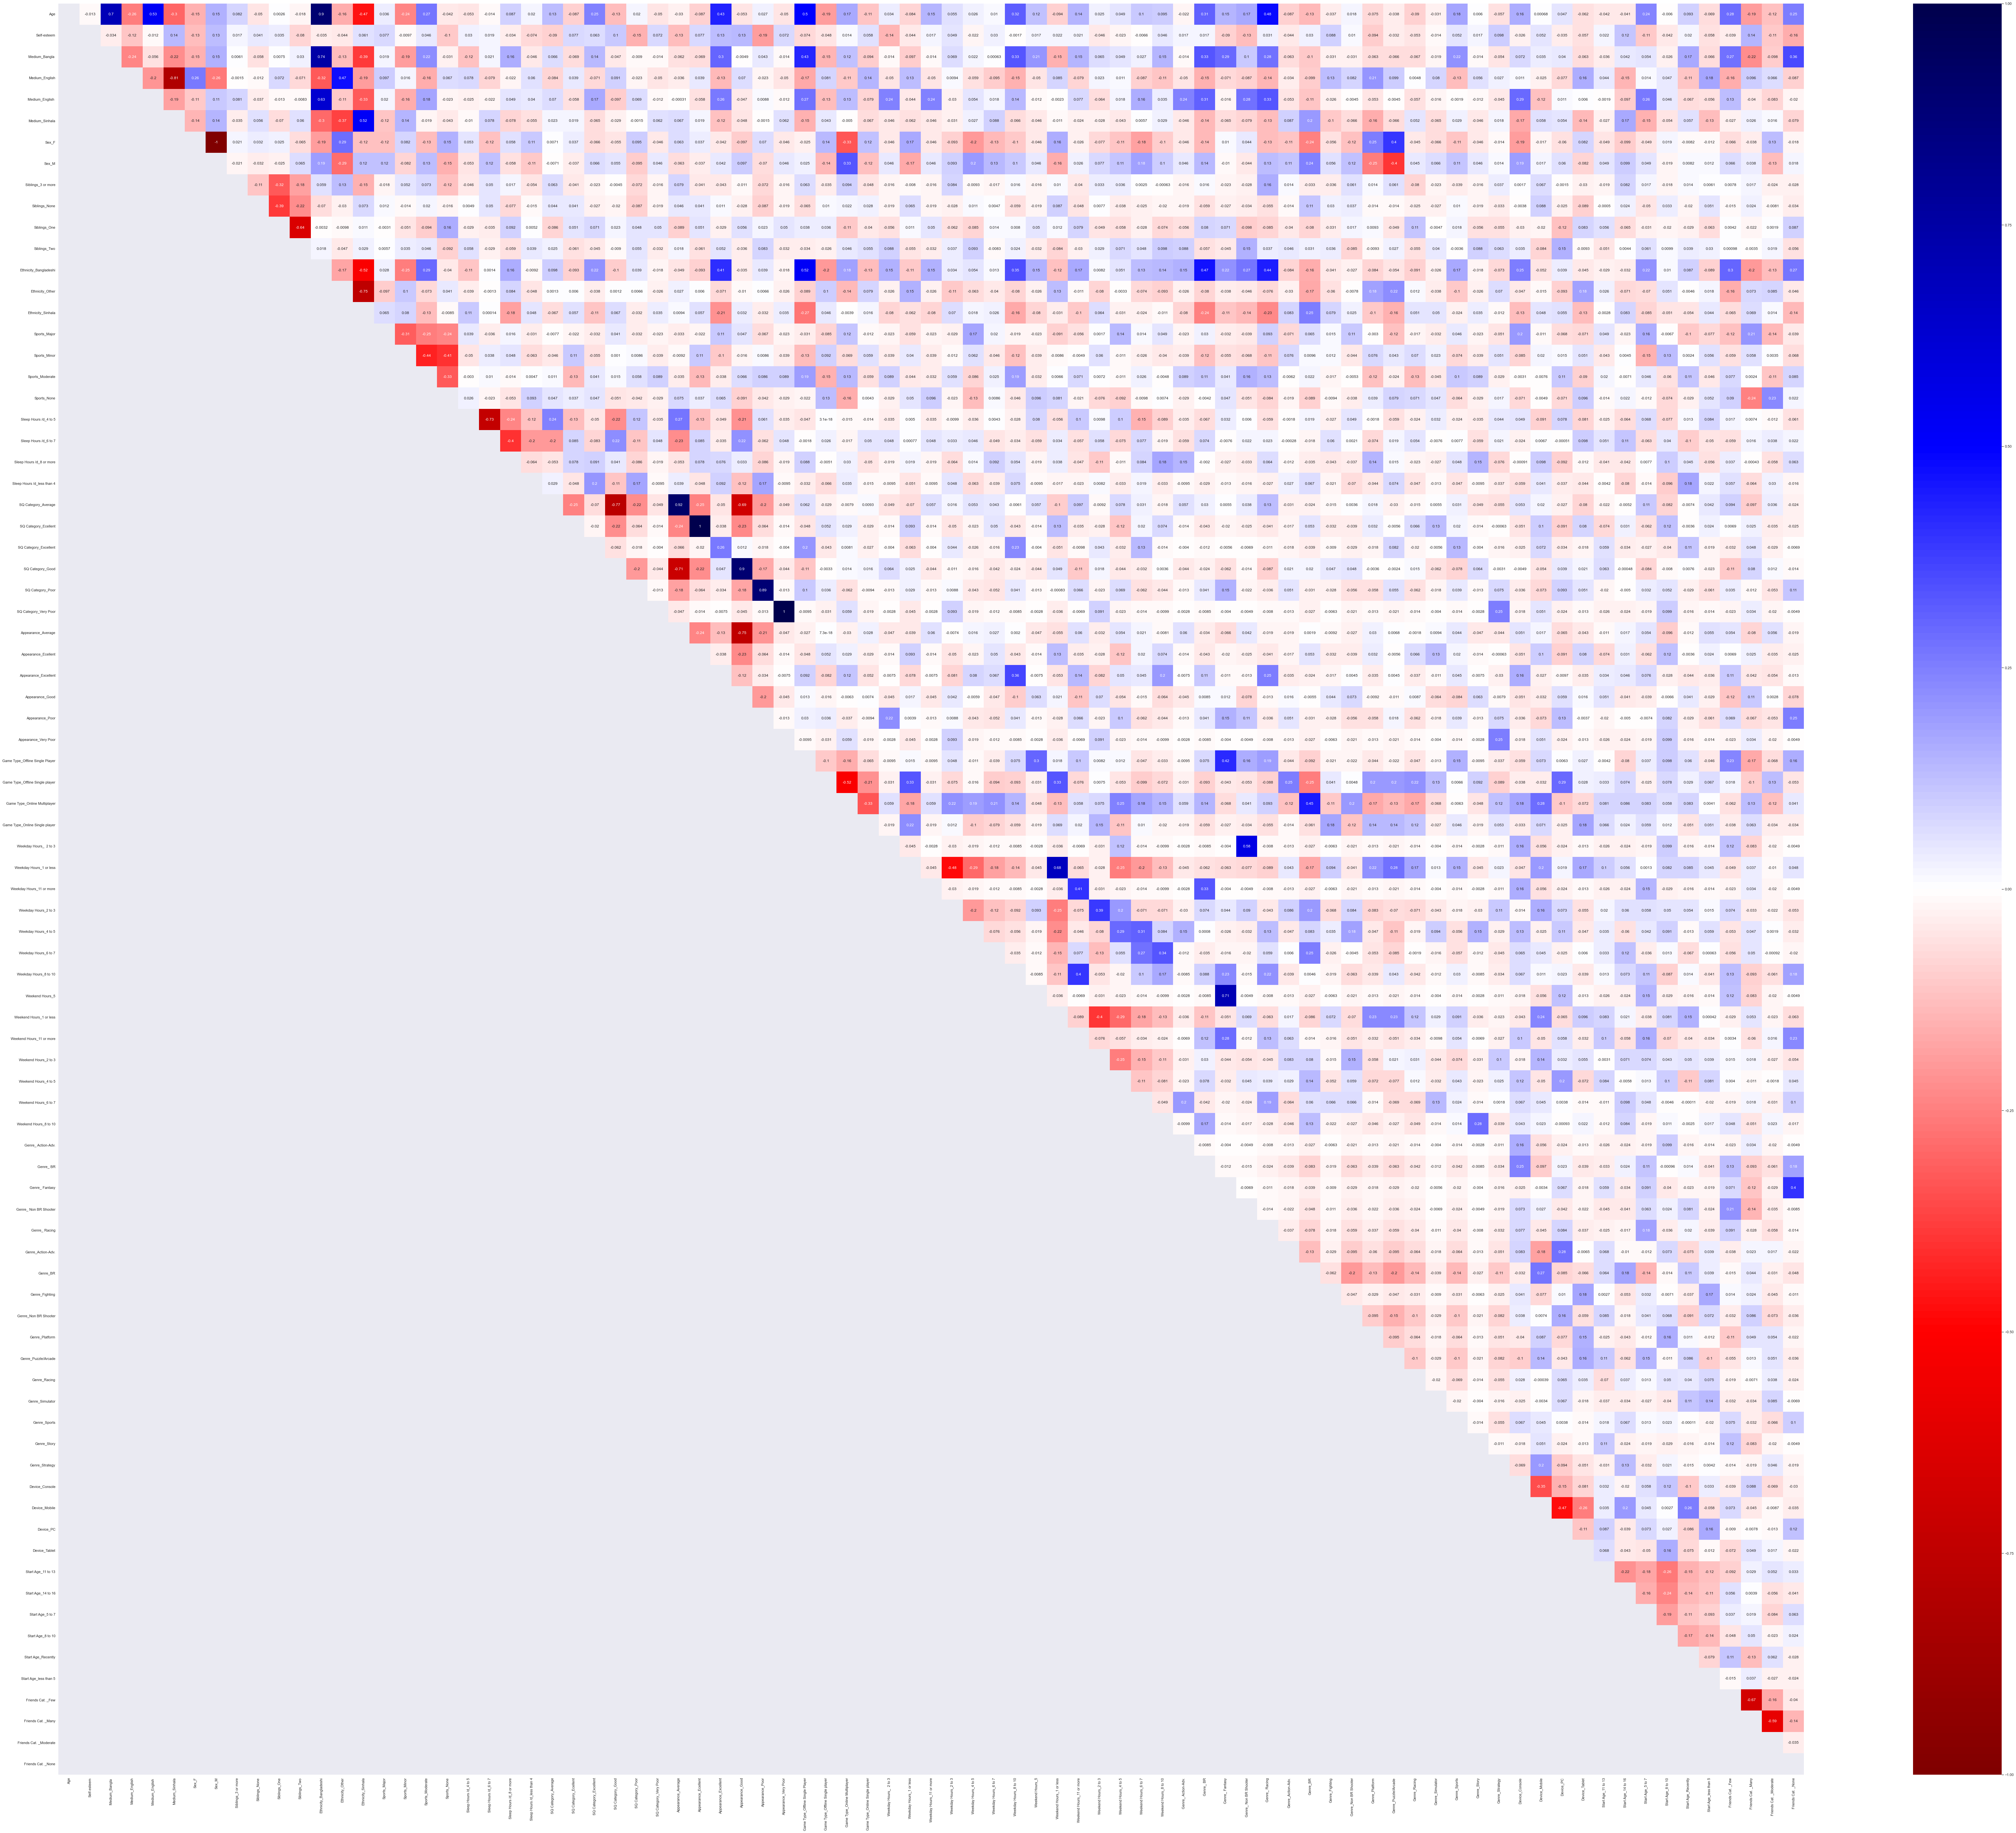

In [35]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (120,100))
sns.heatmap(corr, annot = True, cmap = 'seismic_r', mask = mask2);
# plt.savefig('heatmap_half.png', bbox_inches="tight") # for saving image

In [36]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(X_train, 0.91) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

4
{'Sex_M', 'Appearance_Ecellent', 'Appearance_Very Poor', 'Appearance_Average'}


The above are the highly correlated feature(s)

In [38]:
X_train.drop(columns=corr_features)
X_test.drop(columns=corr_features)

Age  Self-esteem  Medium_Bangla   Medium_English  Medium_English   \
423   23            4               1               0                0   
376   17            3               0               0                0   
364   17            4               0               0                0   
167   17            4               0               1                0   
101   17            3               0               1                0   
..   ...          ...             ...             ...              ...   
425   22            5               0               0                1   
97    17            3               0               1                0   
37    17            4               0               0                0   
20    18            5               0               0                0   
383   18            4               0               0                0   

     Medium_Sinhala  Sex_F  Siblings_3 or more  Siblings_None  Siblings_One  \
423               0      1                   0              0             0   
376               1      0                   0              0             1   
364               1      0                   0              0             1   
167               0      1                   0              0             1   
101               0      0                   0              0             1   
..              ...    ...                 ...            ...           ...   
425               0      0                   0              0             1   
97                0      0                   0              1             0   
37                1      0                   1              0             0   
20                1      0                   0              0             1   
383               1      1                   0              0             1   

     ...  Start Age_11 to 13  Start Age_14 to 16  Start Age_5 to 7  \
423  ...                   0                   0                 1   
376  ...                   1                   0                 0   
364  ...                   1                   0                 0   
167  ...                   0                   1                 0   
101  ...                   0                   1                 0   
..   ...                 ...                 ...               ...   
425  ...                   0                   1                 0   
97   ...                   0                   0                 1   
37   ...                   0                   0                 0   
20   ...                   0                   0                 0   
383  ...                   1                   0                 0   

     Start Age_8 to 10  Start Age_Recently  Start Age_less than 5  \
423                  0                   0                      0   
376                  0                   0                      0   
364                  0                   0                      0   
167                  0                   0                      0   
101                  0                   0                      0   
..                 ...                 ...                    ...   
425                  0                   0                      0   
97                   0                   0                      0   
37                   0                   0                      0   
20                   0                   0                      0   
383                  0                   0                      0   

     Friends Cat. _Few  Friends Cat. _Many  Friends Cat. _Moderate  \
423                  1                   0                       0   
376                  0                   0                       1   
364                  0                   1                       0   
167                  0                   1                       0   
101                  0                   0                       1   
..                 ...                 ...                     ...   
425    

# 5 Scaling the columns

In [39]:
# new_raw_data.describe()
X_train.describe()

Age  Self-esteem  Medium_Bangla   Medium_English  \
count  356.000000   356.000000      356.000000      356.000000   
mean    17.783708     3.676966        0.061798        0.469101   
std      1.909462     0.981306        0.241127        0.499747   
min     16.000000     1.000000        0.000000        0.000000   
25%     17.000000     3.000000        0.000000        0.000000   
50%     17.000000     4.000000        0.000000        0.000000   
75%     18.000000     4.000000        0.000000        1.000000   
max     25.000000     5.000000        1.000000        1.000000   

       Medium_English   Medium_Sinhala       Sex_F       Sex_M  \
count       356.000000      356.000000  356.000000  356.000000   
mean          0.044944        0.424157    0.432584    0.567416   
std           0.207472        0.494910    0.496132    0.496132   
min           0.000000        0.000000    0.000000    0.000000   
25%           0.000000        0.000000    0.000000    0.000000   
50%           0.000000        0.000000    0.000000    1.000000   
75%           0.000000        1.000000    1.000000    1.000000   
max           1.000000        1.000000    1.000000    1.000000   

       Siblings_3 or more  Siblings_None  ...  Start Age_11 to 13  \
count          356.000000     356.000000  ...          356.000000   
mean             0.084270       0.117978  ...            0.191011   
std              0.278183       0.323036  ...            0.393651   
min              0.000000       0.000000  ...            0.000000   
25%              0.000000       0.000000  ...            0.000000   
50%              0.000000       0.000000  ...            0.000000   
75%              0.000000       0.000000  ...            0.000000   
max              1.000000       1.000000  ...            1.000000   

       Start Age_14 to 16  Start Age_5 to 7  Start Age_8 to 10  \
count          356.000000        356.000000         356.000000   
mean             0.165730          0.115169           0.224719   
std              0.372362          0.319675           0.417985   
min              0.000000          0.000000           0.000000   
25%              0.000000          0.000000           0.000000   
50%              0.000000          0.000000           0.000000   
75%              0.000000          0.000000           0.000000   
max              1.000000          1.000000           1.000000   

       Start Age_Recently  Start Age_less than 5  Friends Cat. _Few  \
count          356.000000             356.000000         356.000000   
mean             0.087079               0.061798           0.157303   
std              0.282347               0.241127           0.364599   
min              0.000000               0.000000           0.000000   
25%              0.000000               0.000000           0.000000   
50%              0.000000               0.000000           0.000000   
75%              0.000000               0.000000           0.000000   
max              1.000000               1.000000           1.000000   

       Friends Cat. _Many  Friends Cat. _Moderate  Friends Cat. _None  
count          356.000000              356.000000          356.000000  
mean             0.707865                0.126404            0.008427  
std              0.455384                0.332772            0.091540  
min              0.000000                0.000000            0.000000  
25%              0.000000                0.000000            0.000000  
50%              1.000000                0.000000            0.000000  
75%              1.000000                0.000000            0.000000  
max              1.000000                1.000000            1.000000  

[8 rows x 83 columns]

In [40]:
X_train.columns

Index(['Age', 'Self-esteem', 'Medium_Bangla ', 'Medium_English',
       'Medium_English ', 'Medium_Sinhala', 'Sex_F', 'Sex_M',
       'Siblings_3 or more', 'Siblings_None', 'Siblings_One', 'Siblings_Two',
       'Ethnicity_Bangladeshi', 'Ethnicity_Other', 'Ethnicity_Sinhala',
       'Sports_Major', 'Sports_Minor', 'Sports_Moderate', 'Sports_None',
       'Sleep Hours /d_4 to 5', 'Sleep Hours /d_6 to 7',
       'Sleep Hours /d_8 or more', 'Sleep Hours /d_less than 4',
       'SQ Category_Average', 'SQ Category_Ecellent', 'SQ Category_Excellent',
       'SQ Category_Good', 'SQ Category_Poor', 'SQ Category_Very Poor',
       'Appearance_Average', 'Appearance_Ecellent', 'Appearance_Excellent',
       'Appearance_Good', 'Appearance_Poor', 'Appearance_Very Poor',
       'Game Type_Offline Single Player', 'Game Type_Offline Single player',
       'Game Type_Online Multiplayer', 'Game Type_Online Single player',
       'Weekday Hours_  2 to 3', 'Weekday Hours_1 or less',
       'Weekday Hours_

#### Check for the columns that need scaling

In [41]:
need_scaling = [];
print('The column names for the data that need to be scaled are given below: ')
for column in X_train:
    maximum = X_train[column].values.max()
    minimum = X_train[column].values.min()
    if (maximum!=1.0 or minimum!=0.0):
        need_scaling.append(column)
        print('\t{}'.format(column))      
if len(need_scaling) == 0:
    print('no columns needed')
    
#     unique_vals = raw_dataColumn[column].unique()
#     nr_values = len(unique_vals)
#     if nr_values < 12:
#         print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
#     else:
#         print('The number of values for feature {} :{}'.format(column, nr_values))


The column names for the data that need to be scaled are given below: 
	Age
	Self-esteem


In [42]:
if len(need_scaling)!=0:
    print('----------------------------------------------------------------------------------------------')
    print('Setting scaling for dataframe')
    #fit
    scaler = MinMaxScaler()
    scaler.fit(X_train[need_scaling])
    print('Scaling the data and saving them in same dataframe')
    # transform
    X_train[need_scaling] = scaler.transform(X_train[need_scaling])
    X_test[need_scaling] = scaler.transform(X_test[need_scaling])
    print('----------------------------------------------------------------------------------------------')
    print('Completed')

----------------------------------------------------------------------------------------------
Setting scaling for dataframe
Scaling the data and saving them in same dataframe
----------------------------------------------------------------------------------------------
Completed


In [43]:
X_train.head()

Age  Self-esteem  Medium_Bangla   Medium_English  Medium_English   \
94   0.111111         0.75               0               1                0   
324  0.111111         0.50               0               1                0   
298  0.111111         0.75               0               1                0   
347  0.111111         1.00               0               1                0   
427  0.777778         0.75               1               0                0   

     Medium_Sinhala  Sex_F  Sex_M  Siblings_3 or more  Siblings_None  ...  \
94                0      0      1                   0              0  ...   
324               0      0      1                   0              0  ...   
298               0      1      0                   0              0  ...   
347               0      0      1                   0              0  ...   
427               0      0      1                   0              0  ...   

     Start Age_11 to 13  Start Age_14 to 16  Start Age_5 to 7  \
94                    0                   0                 1   
324                   0                   0                 0   
298                   0                   0                 0   
347                   0                   0                 0   
427                   0                   0                 0   

     Start Age_8 to 10  Start Age_Recently  Start Age_less than 5  \
94                   0                   0                      0   
324                  0                   0                      1   
298                  0                   0                      1   
347                  0                   0                      0   
427                  0                   1                      0   

     Friends Cat. _Few  Friends Cat. _Many  Friends Cat. _Moderate  \
94                   0                   1                       0   
324                  0                   1                       0   
298                  1                   0                       0   
347                  0                   1                       0   
427                  0                   1                       0   

     Friends Cat. _None  
94                    0  
324                   0  
298                   0  
347                   0  
427                   0  

[5 rows x 83 columns]

In [44]:
X_test.head()

Age  Self-esteem  Medium_Bangla   Medium_English  Medium_English   \
423  0.777778         0.75               1               0                0   
376  0.111111         0.50               0               0                0   
364  0.111111         0.75               0               0                0   
167  0.111111         0.75               0               1                0   
101  0.111111         0.50               0               1                0   

     Medium_Sinhala  Sex_F  Sex_M  Siblings_3 or more  Siblings_None  ...  \
423               0      1      0                   0              0  ...   
376               1      0      1                   0              0  ...   
364               1      0      1                   0              0  ...   
167               0      1      0                   0              0  ...   
101               0      0      1                   0              0  ...   

     Start Age_11 to 13  Start Age_14 to 16  Start Age_5 to 7  \
423                   0                   0                 1   
376                   1                   0                 0   
364                   1                   0                 0   
167                   0                   1                 0   
101                   0                   1                 0   

     Start Age_8 to 10  Start Age_Recently  Start Age_less than 5  \
423                  0                   0                      0   
376                  0                   0                      0   
364                  0                   0                      0   
167                  0                   0                      0   
101                  0                   0                      0   

     Friends Cat. _Few  Friends Cat. _Many  Friends Cat. _Moderate  \
423                  1                   0                       0   
376                  0                   0                       1   
364                  0                   1                       0   
167                  0                   1                       0   
101                  0                   0                       1   

     Friends Cat. _None  
423                   0  
376                   0  
364                   0  
167                   0  
101                   0  

[5 rows x 83 columns]

# 6. Model Training and Results

## 6.1 Zero R classifier

In [45]:
zero_R = DummyClassifier(strategy='most_frequent')
zero_R.fit(X_train,y_train)
y_pred = zero_R.predict(y_train)

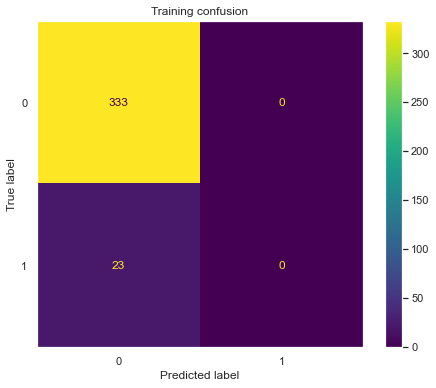

In [46]:
cm = confusion_matrix(y_train, y_pred,labels=zero_R.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=zero_R.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Training confusion')
plt.show()

In [47]:
score_t = f1_score(y_train,y_pred)
print('f1 score for Training is: ', score_t)

f1 score for Training is:  0.0


In [48]:
y_pred = zero_R.predict(y_test)

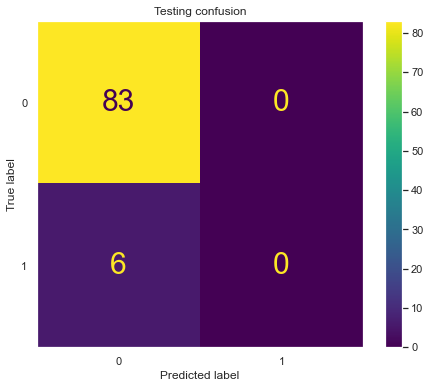

In [49]:
cm = confusion_matrix(y_test, y_pred,labels=zero_R.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=zero_R.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Testing confusion')
# plt.savefig('Zero R Testing confusion.png', bbox_inches="tight") #for saving image
plt.show()

In [50]:
zero_R.score(X_train,y_train)*100

93.53932584269663

In [51]:
zero_R.score(X_test,y_test)*100

93.25842696629213

In [52]:
score_t = f1_score(y_test,y_pred)
print('f1 score for Testing is: ', score_t)

f1 score for Testing is:  0.0


## 6.2 One R Classifier

In [53]:
one_R = DummyClassifier(strategy='prior')
one_R.fit(X_train,y_train)
y_pred = one_R.predict(y_train)

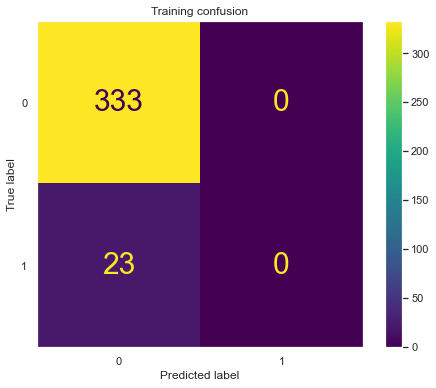

In [54]:
cm = confusion_matrix(y_train, y_pred,labels=one_R.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=one_R.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Training confusion')
# plt.savefig('Zero R Training confusion.png', bbox_inches="tight") # for saving image
plt.show()

In [55]:
score_t = f1_score(y_train,y_pred)
print('f1 score for Training is: ', score_t)

f1 score for Training is:  0.0


In [56]:
y_pred = one_R.predict(y_test)

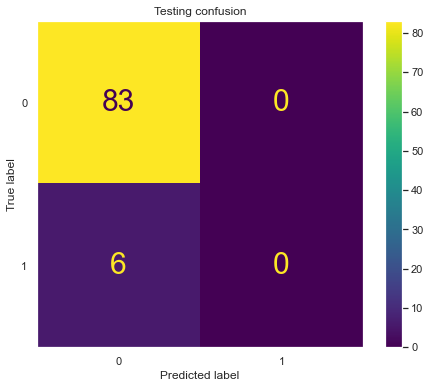

In [57]:
cm = confusion_matrix(y_test, y_pred,labels=one_R.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=one_R.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Testing confusion')
plt.show()

In [58]:
one_R.score(X_train,y_train)*100

93.53932584269663

In [59]:
one_R.score(X_test,y_test)*100

93.25842696629213

In [60]:
score_t = f1_score(y_test,y_pred)
print('f1 score for Testing is: ', score_t)

f1 score for Testing is:  0.0


## 6.3 Decision Tree

In [61]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 3, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [62]:
# Checking for null values
X_train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file='tree1.dot', 
    feature_names=new_raw_data.drop('IGD Status_Y', axis=1).columns,    
    class_names=new_raw_data['IGD Status_Y'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
# graph
# To visulaize the tree, please paste the code in dot file in the editor of the following link: 
# https://dreampuf.github.io/GraphvizOnline

In [64]:
# !dir

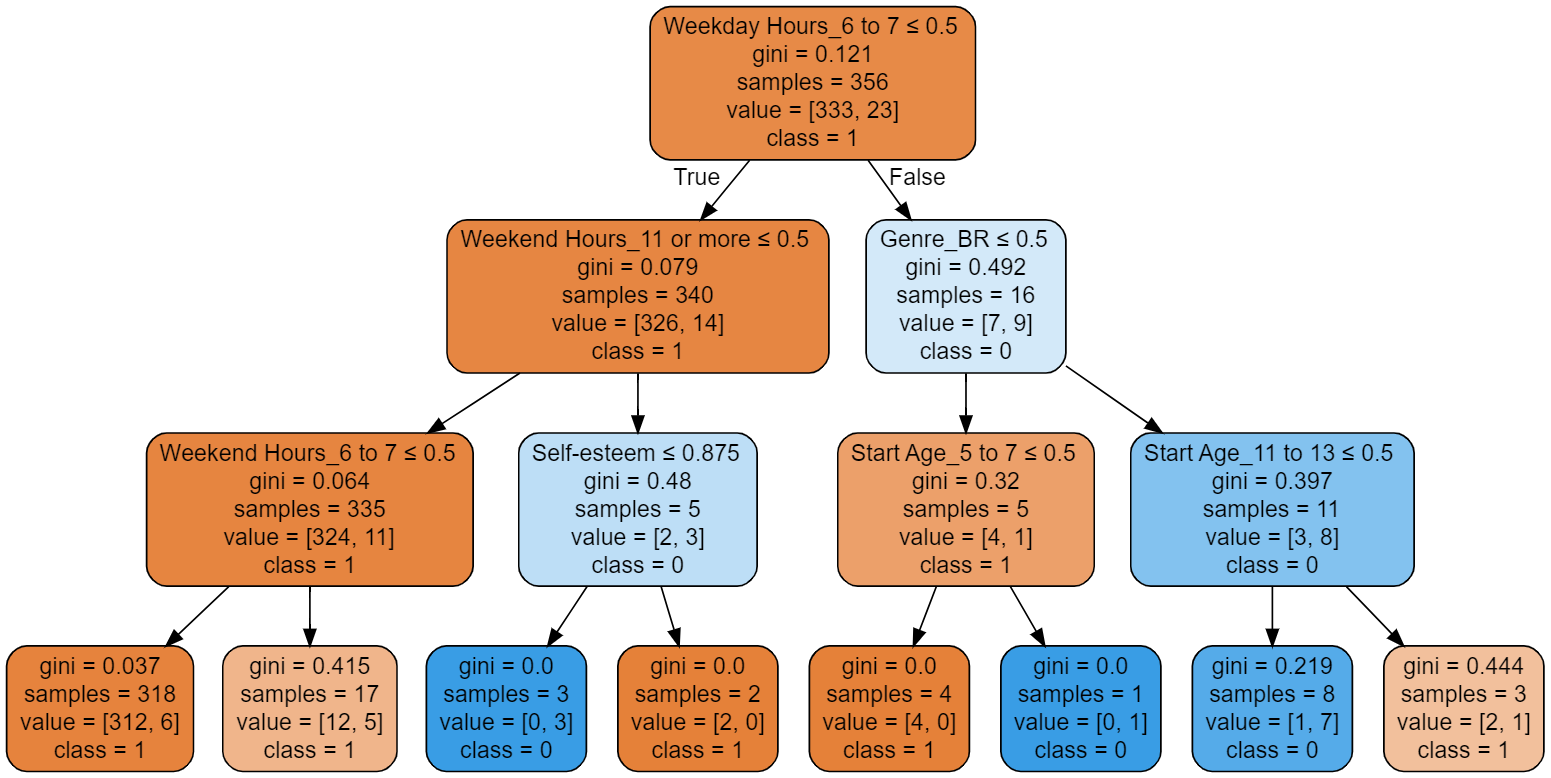

In [65]:
# import pydot
# (graph1,) = pydot.graph_from_dot_file('tree.dot')
# graph1.write_png('somefile.png')



# ! dot -Tpng tree.dot -o tree.png
Image(filename = 'tree11.png', width=900, height=900)

### Feature Importance for Decision Tree

In [66]:
for i, column in enumerate(new_raw_data.drop('IGD Status_Y', axis=1)):
#     print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

index                  Variable  Feature Importance Score
0      44      Weekday Hours_6 to 7                  0.393421
1      48  Weekend Hours_11 or more                  0.150123
2      51      Weekend Hours_6 to 7                  0.115819
3       1               Self-esteem                  0.113678
4      59                  Genre_BR                  0.090533
..    ...                       ...                       ...
78     26          SQ Category_Good                  0.000000
79     25     SQ Category_Excellent                  0.000000
80     24      SQ Category_Ecellent                  0.000000
81     23       SQ Category_Average                  0.000000
82     82        Friends Cat. _None                  0.000000

[83 rows x 3 columns]

In [67]:
y_predTrain = dt.predict(X_train)
y_predTest = dt.predict(X_test)

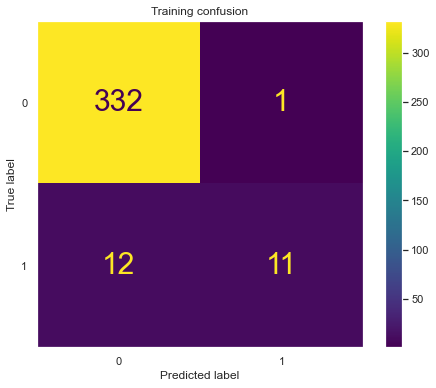

In [68]:
cm = confusion_matrix(y_train, y_predTrain,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.rc('font', size=30)
plt.grid(False)
plt.title('Training confusion')
# plt.savefig('Decision Tree Training confusion.png', bbox_inches="tight") #for saving image
plt.show()

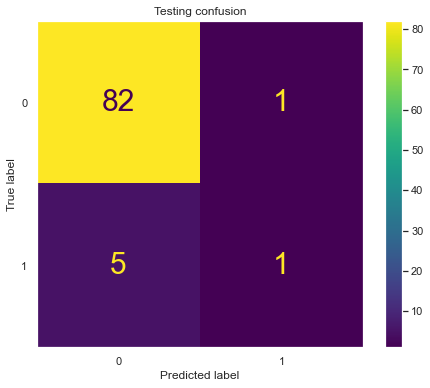

In [69]:
cm = confusion_matrix(y_test, y_predTest,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Testing confusion')
# plt.savefig('Decision Tree Testing confusion.png', bbox_inches="tight") #for saving image
plt.show()

In [70]:
# Accuracy on Train
print('Training Accuracy is: ', dt.score(X_train, y_train))

# Accuracy on Test
print('Testing Accuracy is: ', dt.score(X_test, y_test))

Training Accuracy is:  0.9634831460674157
Testing Accuracy is:  0.9325842696629213


In [71]:
score_t = f1_score(y_train,y_predTrain)
print('f1 score for Training is: ', score_t)

f1 score for Training is:  0.6285714285714286


In [72]:
score_t = f1_score(y_test,y_predTest)
print('f1 score for Testing is: ', score_t)

f1 score for Testing is:  0.25


## 6.4 K Nearest Neighbour

In [73]:
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)

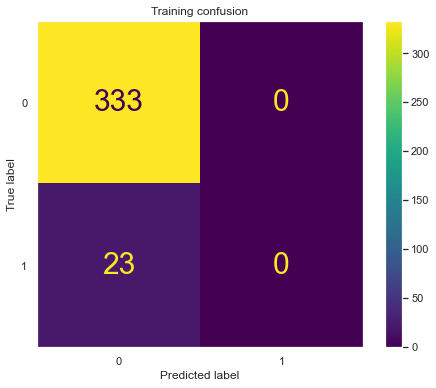

In [74]:
cm = confusion_matrix(y_train, y_predTrain,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.rc('font', size=30)
plt.grid(False)
plt.title('Training confusion')
# plt.savefig('KNN Training confusion.png', bbox_inches="tight") #for saving image
plt.show()

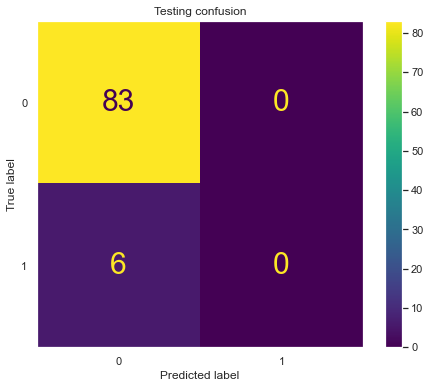

In [75]:
cm = confusion_matrix(y_test, y_predTest,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Testing confusion')
# plt.savefig('KNN testing confusion.png', bbox_inches="tight") #for saving image
plt.show()

In [76]:
# Accuracy on Train
print('Training Accuracy is: ', clf.score(X_train, y_train))

# Accuracy on Test
print('Testing Accuracy is: ', clf.score(X_test, y_test))

Training Accuracy is:  0.9353932584269663
Testing Accuracy is:  0.9325842696629213


In [77]:
score_t = f1_score(y_train,y_predTrain)
print('f1 score for Training is: ', score_t)

f1 score for Training is:  0.0


In [78]:
score_t = f1_score(y_test,y_predTest)
print('f1 score for Testing is: ', score_t)

f1 score for Testing is:  0.0


# 7. Hyper parameter optimization

## 7.1 Decision Tree

Depth =  2 , Training Accuracy =  0.952247191011236 , Test Accuracy =  0.9325842696629213 , Diff =  1.966292134831471  %
Depth =  3 , Training Accuracy =  0.9634831460674157 , Test Accuracy =  0.9438202247191011 , Diff =  1.96629213483146  %
Depth =  4 , Training Accuracy =  0.9719101123595506 , Test Accuracy =  0.9213483146067416 , Diff =  5.0561797752809  %
Depth =  5 , Training Accuracy =  0.9831460674157303 , Test Accuracy =  0.9101123595505618 , Diff =  7.303370786516849  %
Depth =  6 , Training Accuracy =  0.9887640449438202 , Test Accuracy =  0.8876404494382022 , Diff =  10.1123595505618  %
Depth =  7 , Training Accuracy =  0.9943820224719101 , Test Accuracy =  0.8764044943820225 , Diff =  11.79775280898876  %
Depth =  8 , Training Accuracy =  0.9971910112359551 , Test Accuracy =  0.8539325842696629 , Diff =  14.32584269662922  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.8651685393258427 , Diff =  13.48314606741573  %
Depth =  10 , Training Accuracy =  1.0 , Tes

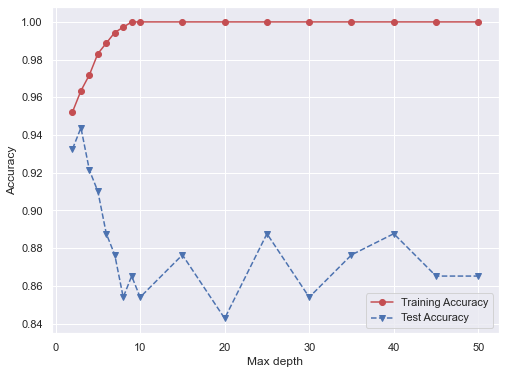

In [79]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print('Depth = ', depth, ', Training Accuracy = ', trainAcc[index], ', Test Accuracy = ', testAcc[index], 
          ', Diff = ', np.abs((trainAcc[index]-testAcc[index])*100), ' %')
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');
# plt.savefig('hyperTree.png', bbox_inches="tight") #for saving image

## 7.2 KNN Classifier

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.9325842696629213 , Difference =  6.741573033707871 %
K =  5 , Training Accuracy =  0.9353932584269663  Test Accuracy =  0.9325842696629213 , Difference =  0.2808988764045006 %
K =  10 , Training Accuracy =  0.9353932584269663  Test Accuracy =  0.9325842696629213 , Difference =  0.2808988764045006 %
K =  15 , Training Accuracy =  0.9353932584269663  Test Accuracy =  0.9325842696629213 , Difference =  0.2808988764045006 %
K =  20 , Training Accuracy =  0.9353932584269663  Test Accuracy =  0.9325842696629213 , Difference =  0.2808988764045006 %
K =  25 , Training Accuracy =  0.9353932584269663  Test Accuracy =  0.9325842696629213 , Difference =  0.2808988764045006 %
K =  30 , Training Accuracy =  0.9353932584269663  Test Accuracy =  0.9325842696629213 , Difference =  0.2808988764045006 %


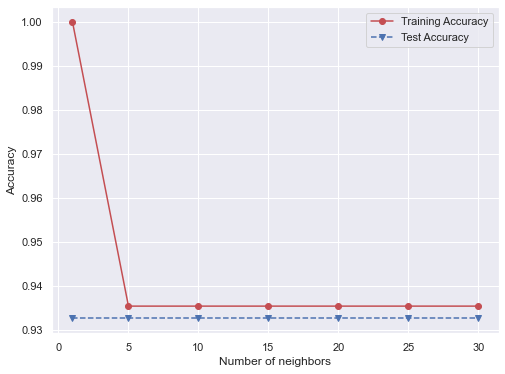

In [80]:
from sklearn.neighbors import KNeighborsClassifier
# X = new_raw_data.drop(columns = 'IGD Status_Y').values# Input features (attributes)
# y = new_raw_data['IGD Status_Y'].values # Target vector
# print('X shape: {}'.format(np.shape(X)))
# print('y shape: {}'.format(np.shape(y)))

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print('K = ', numNeighbors[index], ', Training Accuracy = ', trainAcc[index], ' Test Accuracy = ', testAcc[index], 
          ', Difference = ', np.abs(trainAcc[index]-testAcc[index])*100, '%')
    index+=1
# plt.savefig('HyperKnn.png', bbox_inches="tight") #for saving image

# 8 Improved model

## 8.1 Improved Decision Tree

In [81]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 20, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=1)

In [82]:
# Checking for null values
X_train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [83]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file='tree5.dot', 
    feature_names=new_raw_data.drop('IGD Status_Y', axis=1).columns,    
    class_names=new_raw_data['IGD Status_Y'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
# graph
# To visulaize the tree, please paste the code in dot file in the editor of the following link: 
# https://dreampuf.github.io/GraphvizOnline

In [84]:
# !dir

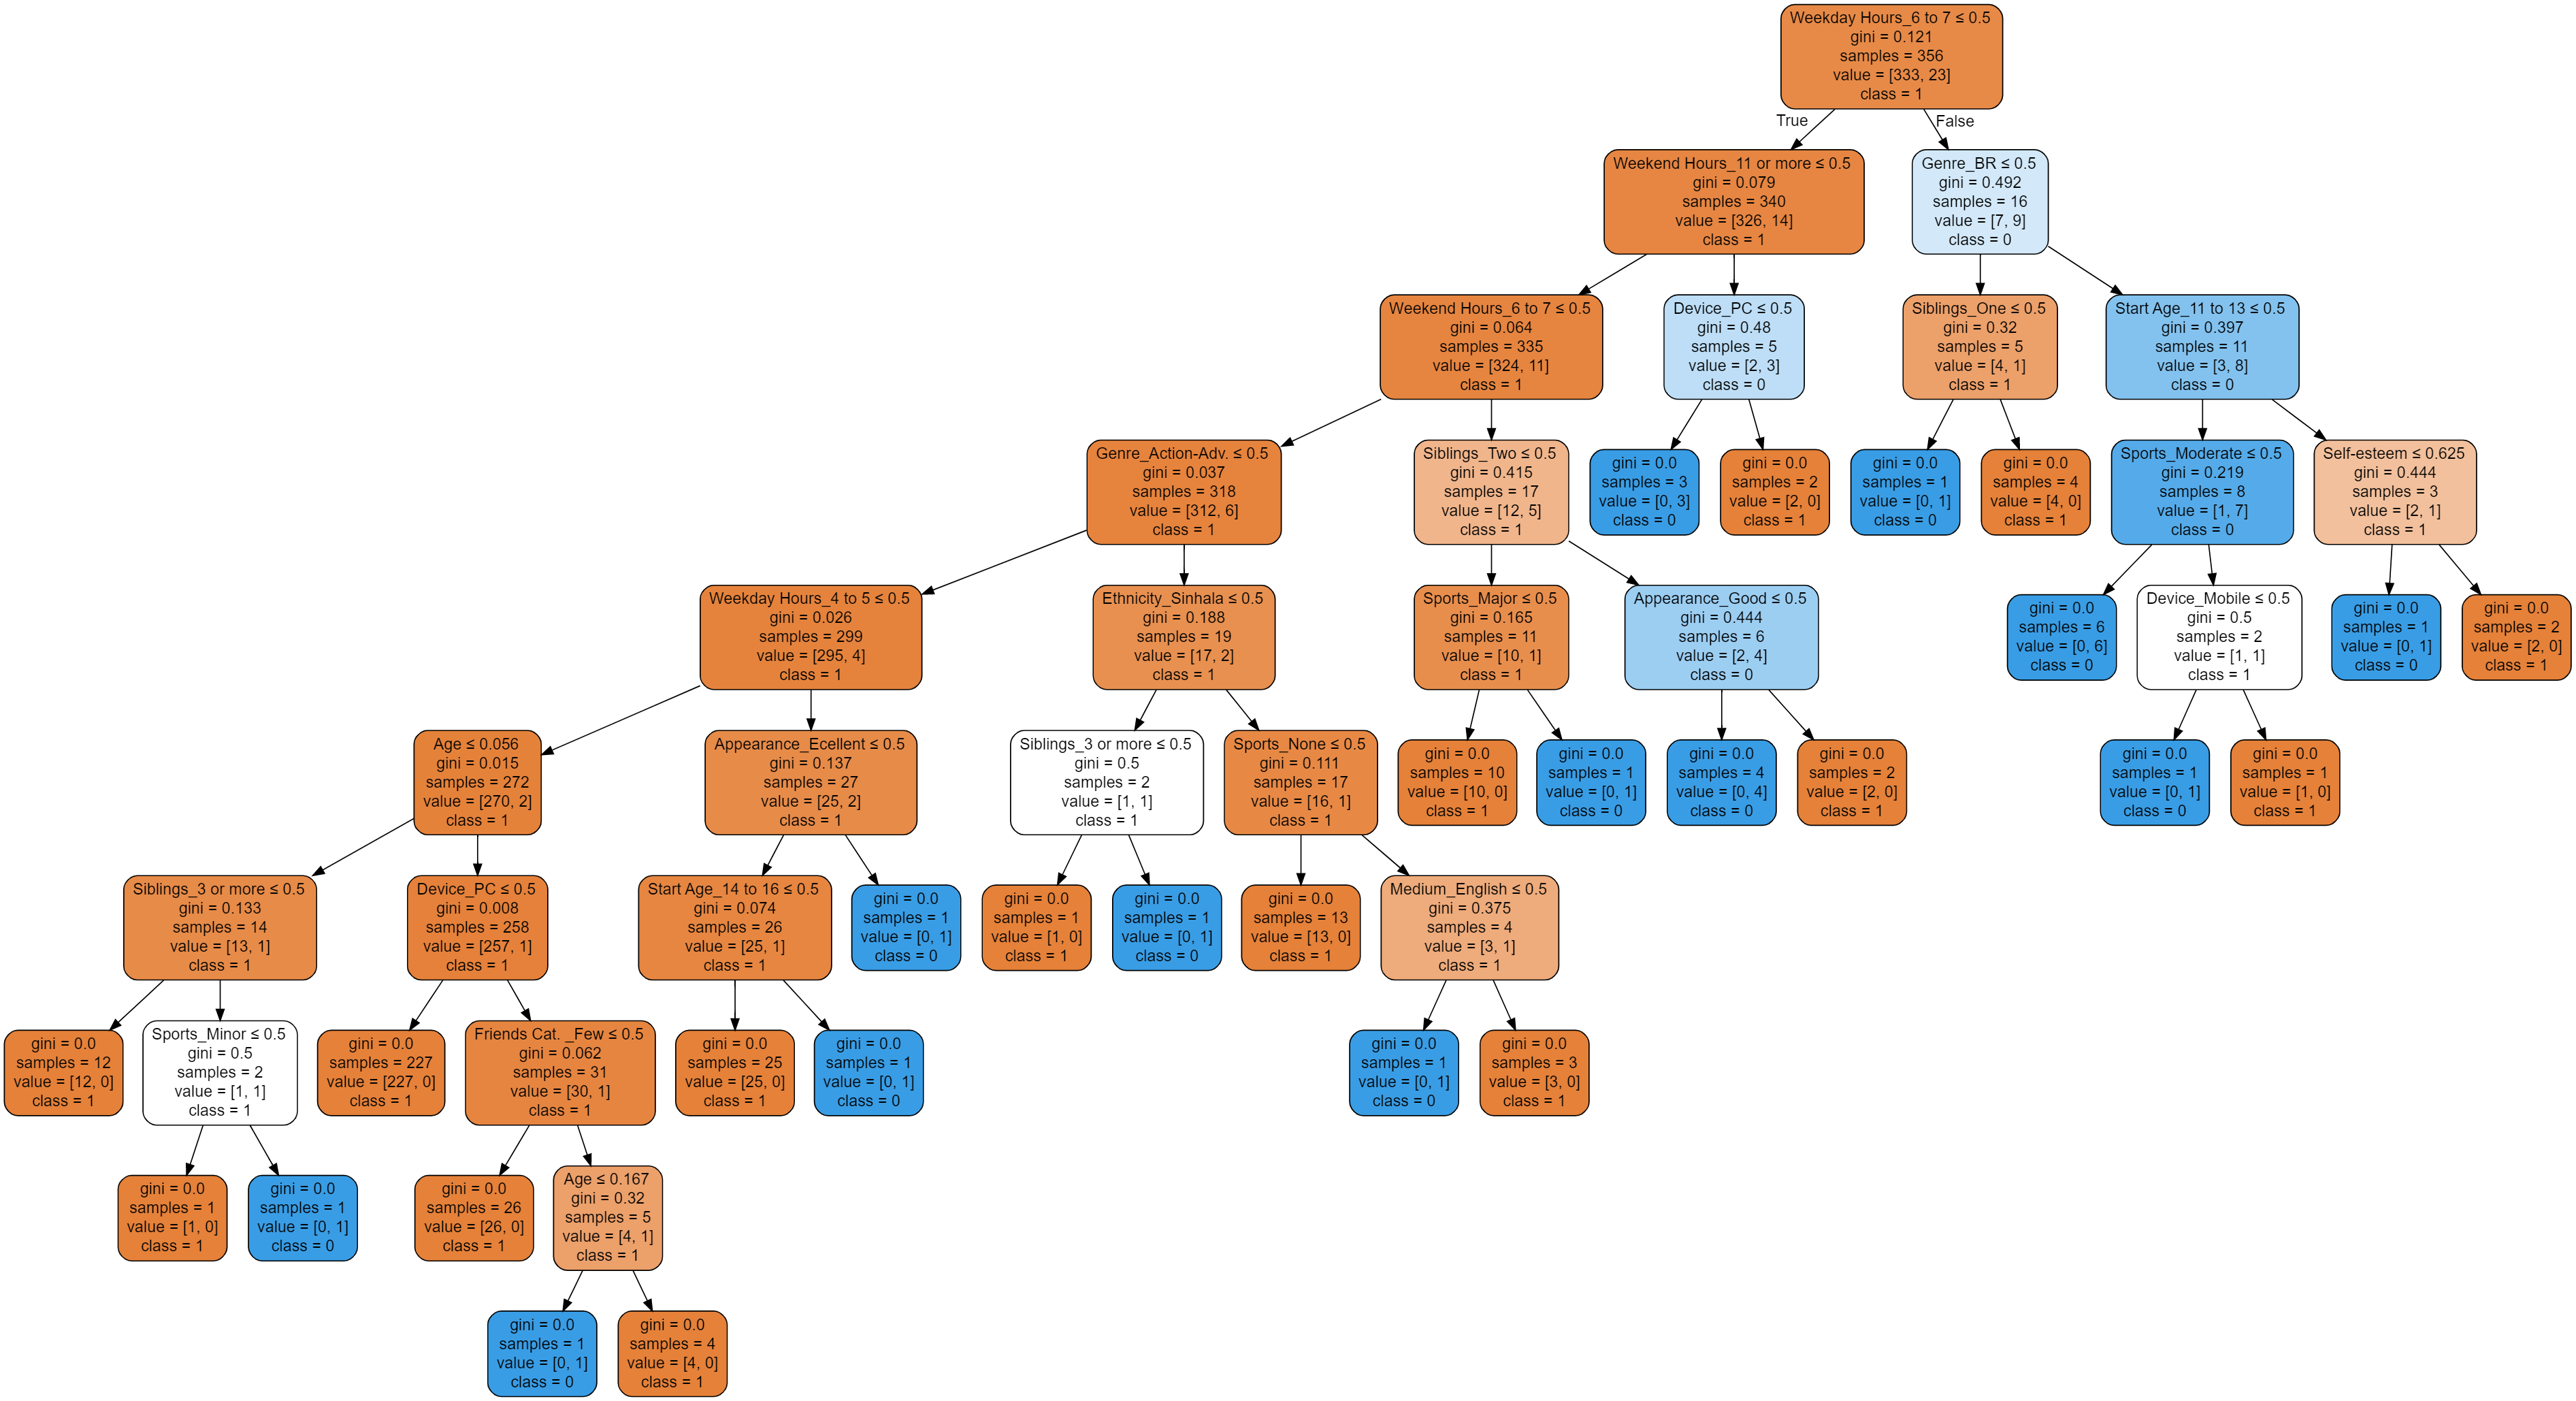

In [85]:
# import pydot
# (graph1,) = pydot.graph_from_dot_file('tree.dot')
# graph1.write_png('somefile.png')



# ! dot -Tpng tree.dot -o tree.png
Image(filename = 'tree10.png', width=900, height=900)

### Feature Importance for Decision Tree

In [86]:
for i, column in enumerate(new_raw_data.drop('IGD Status_Y', axis=1)):
#     print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

level_0  index                         Variable  Feature Importance Score
0          0   44.0             Weekday Hours_6 to 7                  0.393421
1        127    NaN             Weekday Hours_6 to 7                  0.193037
2          1   48.0         Weekend Hours_11 or more                  0.150123
3          2   51.0             Weekend Hours_6 to 7                  0.115819
4          3    1.0                      Self-esteem                  0.113678
..       ...    ...                              ...                       ...
161       67   37.0     Game Type_Online Multiplayer                  0.000000
162       68   36.0  Game Type_Offline Single player                  0.000000
163       69   35.0  Game Type_Offline Single Player                  0.000000
164       70   34.0             Appearance_Very Poor                  0.000000
165      165    NaN               Friends Cat. _None                  0.000000

[166 rows x 4 columns]

In [87]:
y_predTrain = dt.predict(X_train)
y_predTest = dt.predict(X_test)

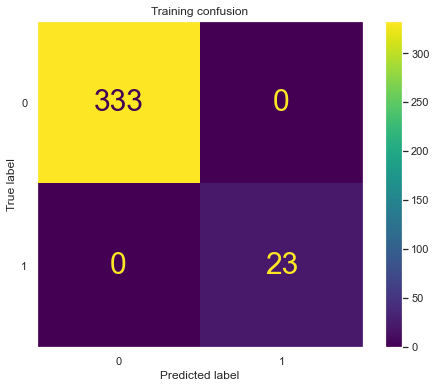

In [88]:
cm = confusion_matrix(y_train, y_predTrain,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.rc('font', size=30)
plt.grid(False)
plt.title('Training confusion')
# plt.savefig('Better Decision Tree Training confusion.png', bbox_inches="tight") #for saving image
plt.show()

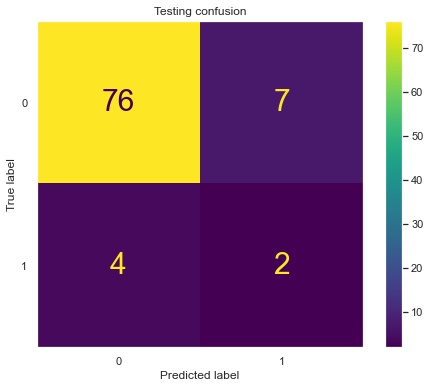

In [89]:
cm = confusion_matrix(y_test, y_predTest,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Testing confusion')
# plt.savefig('Better Decision Tree Testing confusion.png', bbox_inches="tight") #for saving image
plt.show()

In [90]:
# Accuracy on Train
dt_train_score =  dt.score(X_train, y_train)
print('Training Accuracy is: ', dt_train_score)

# Accuracy on Test
dt_test_score = dt.score(X_test, y_test)
print('Testing Accuracy is: ', dt_test_score)

Training Accuracy is:  1.0
Testing Accuracy is:  0.8764044943820225


In [91]:
score_t = f1_score(y_train,y_predTrain)
print('f1 score for Training is: ', score_t)

f1 score for Training is:  1.0


In [92]:
score_t = f1_score(y_test,y_predTest)
print('f1 score for Testing is: ', score_t)

f1 score for Testing is:  0.26666666666666666


## 8.2 Improved K Nearest Neighbour

In [93]:
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)

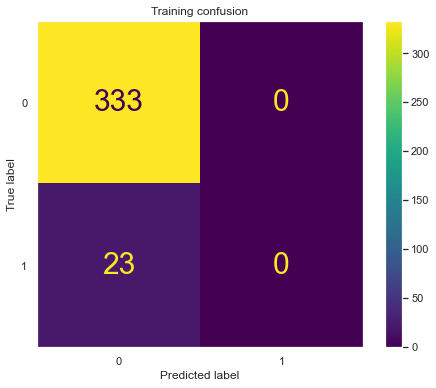

In [94]:
cm = confusion_matrix(y_train, y_predTrain,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.rc('font', size=30)
plt.grid(False)
plt.title('Training confusion')
# plt.savefig('Better KNN Training confusion.png', bbox_inches="tight") #for saving image
plt.show()

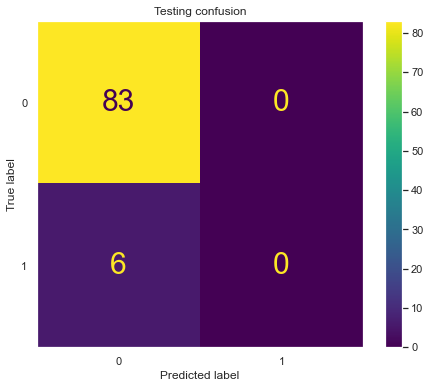

In [95]:
cm = confusion_matrix(y_test, y_predTest,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.rc('font', size=30)
plt.title('Testing confusion')
# plt.savefig('Better KNN Training confusion.png', bbox_inches="tight") #for saving image
plt.show()

In [96]:
# Accuracy on Train
knn_train_score = clf.score(X_train, y_train)
print('Training Accuracy is: ', knn_train_score)

# Accuracy on Test
knn_test_score = clf.score(X_test, y_test)
print('Testing Accuracy is: ', knn_test_score)

Training Accuracy is:  0.9353932584269663
Testing Accuracy is:  0.9325842696629213


In [97]:
score_t = f1_score(y_train,y_predTrain)
print('f1 score for Training is: ', score_t)

f1 score for Training is:  0.0


In [98]:
score_t = f1_score(y_test,y_predTest)
print('f1 score for Testing is: ', score_t)

f1 score for Testing is:  0.0


<h1>9 Further Testing using Different Algorithms</h1>

<h3>9.1 Random Forest Classifier</h3>

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_estimators = 100)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=0)
rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)
 

# Accuracy on Train
rf_train_score = rf.score(X_train, y_train)
print('Training Accuracy is: ', rf_train_score)

print(rf_train_score)

# Accuracy on Test
rf_test_score = rf.score(X_test, y_test)
print('Testing Accuracy is: ', rf_test_score)

#print('ACCURACY OF THE MODEL: ', metrics.accuracy_score(y_test, y_pred))

Training Accuracy is:  1.0
1.0
Testing Accuracy is:  0.9325842696629213


<h3>9.2 Logistic Regression Classifier</h3>

In [100]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=0)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=0)
lr.fit(X_train, y_train)
#y_pred = rf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
# Accuracy on Train
print('Training Accuracy is: ', lr.score(X_train, y_train))
lr_train_score = lr.score(X_train, y_train)
print(lr_train_score)

# Accuracy on Test
print('Testing Accuracy is: ', lr.score(X_test, y_test))
lr_test_score = lr.score(X_test, y_test)
#print('ACCURACY OF THE MODEL: ', metrics.accuracy_score(y_test, y_pred))


Training Accuracy is:  0.952247191011236
0.952247191011236
Testing Accuracy is:  0.9101123595505618


<h1>10 Comparing Classifiers</h1>

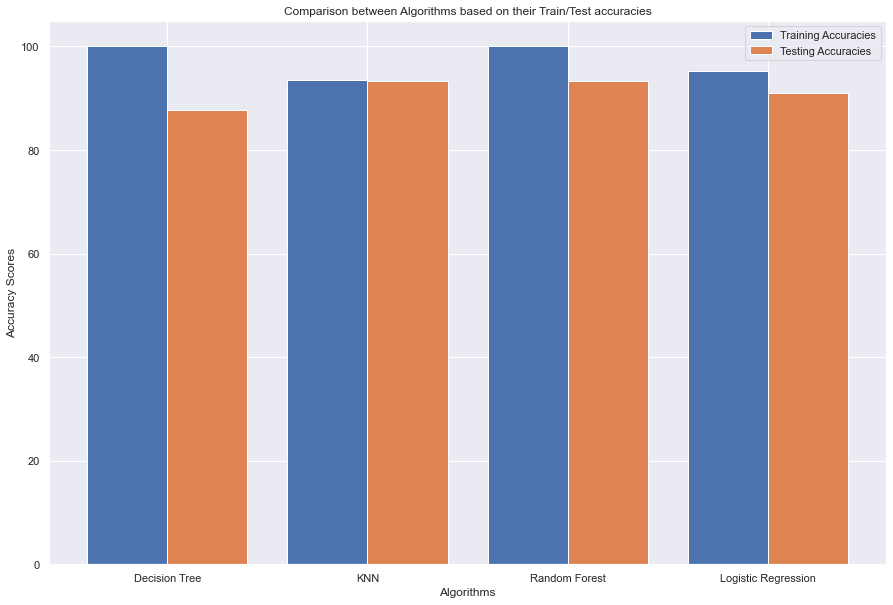

In [101]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Decision Tree', 'KNN', 'Random Forest',  'Logistic Regression']
YTrains1 = [dt_train_score, knn_train_score, rf_train_score, lr_train_score]
YTrains = [i*100 for i in YTrains1]
#YTrains = [100*dt_train_score, 100*knn_train_score, 100*rf_train_score, 100* lr_train_score]
ZTests1 = [dt_test_score, knn_test_score, rf_test_score, lr_test_score]
ZTests = [i*100 for i in ZTests1]
#ZTests = [100*dt_test_score, 100*knn_test_score, 100*rf_test_score, 100* lr_test_score]
  
X_axis = np.arange(len(X))

plt.rcParams['figure.figsize'] = (15, 10)
  
plt.bar(X_axis - 0.2, YTrains, 0.4, label = 'Training Accuracies')
plt.bar(X_axis + 0.2, ZTests, 0.4, label = 'Testing Accuracies')



  
plt.xticks(X_axis, X)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Comparison between Algorithms based on their Train/Test accuracies')
# plt.savefig('comparison.png', bbox_inches='tight') #for saving image
plt.legend()
plt.show()